In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [0]:
pd.options.display.max_rows = 999
pd.options.display.max_columns = 100

# Data Cleaning

In [0]:
metrics = pd.read_excel('data/metrics.xlsx')
metrics.head()

,EntityID,Program,Region,Population,Order,Class,ID,Name,Weight,Key_Master,Denominator,Numerator,Trend_Numerator,Gaps_Population,Predicted_Numerator,Observed,Expected,Rate,Min,Mid,Max,Metric,Points,Count,Total_Metrics,Total_Scored,Total_Points,Score,Total
0,Provider 1,TP,WPA,Adult,1,Static,QN02_3,Comprehensive Diabetes Care: Medical Attention...,1.0,QN02_3,745.0,703.0,NaN,NaN,NaN,NaN,NaN,0.94,0.90,0.92,0.97,0.7,0.7,1.0,17,11.7,11.7,69,17
1,Provider 1,TP,WPA,Adult,2,Static,QN02_4,Comprehensive Diabetes Care: Eye Exam (retinal...,1.0,QN02_4,745.0,498.0,NaN,NaN,NaN,NaN,NaN,0.67,0.52,0.57,0.65,1.0,1.0,1.0,17,11.7,11.7,69,17
2,Provider 1,TP,WPA,Adult,3,Static,QN08,Breast Cancer Screening,1.0,QN08,1998.0,1724.0,NaN,NaN,NaN,NaN,NaN,0.86,0.79,0.82,0.86,1.0,1.0,1.0,17,11.7,11.7,69,17
3,Provider 1,TP,WPA,Adult,4,Static,QN09,Colorectal Cancer Screening,1.0,QN09,3913.0,3186.0,NaN,NaN,NaN,NaN,NaN,0.81,0.68,0.70,0.75,1.0,1.0,1.0,17,11.7,11.7,69,17
4,Provider 1,TP,WPA,Adult,5,Static,QN10,Cervical Cancer Screening,1.0,QN10,3781.0,3081.0,NaN,NaN,NaN,NaN,NaN,0.81,0.77,0.79,0.82,0.7,0.7,1.0,17,11.7,11.7,69,17


In [0]:
metrics.columns

Index(['EntityID', 'Program', 'Region', 'Population', 'Order', 'Class', 'ID',
       'Name', 'Weight', 'Key_Master', 'Denominator', 'Numerator',
       'Trend_Numerator', 'Gaps_Population', 'Predicted_Numerator', 'Observed',
       'Expected', 'Rate', 'Min', 'Mid', 'Max', 'Metric', 'Points', 'Count',
       'Total_Metrics', 'Total_Scored', 'Total_Points', 'Score', 'Total'],
      dtype='object')

In [0]:
# len(metrics[metrics['Denominator'] > 300])
len(metrics)

38488

In [0]:
data = metrics.copy()
data = data[['EntityID', 'Region', 'Population', 'ID', 'Name', 'Denominator', 'Rate', 'Score']]
data.head()

,EntityID,Region,Population,ID,Name,Denominator,Rate,Score
0,Provider 1,WPA,Adult,QN02_3,Comprehensive Diabetes Care: Medical Attention...,745.0,0.94,69
1,Provider 1,WPA,Adult,QN02_4,Comprehensive Diabetes Care: Eye Exam (retinal...,745.0,0.67,69
2,Provider 1,WPA,Adult,QN08,Breast Cancer Screening,1998.0,0.86,69
3,Provider 1,WPA,Adult,QN09,Colorectal Cancer Screening,3913.0,0.81,69
4,Provider 1,WPA,Adult,QN10,Cervical Cancer Screening,3781.0,0.81,69


In [0]:
# look for very low denominators--this will be important later on
gb = adult[adult['Denominator']<100].groupby('ID')
for k in gb.groups.keys():
  group = gb.get_group(k)
  if len(group[group['Denominator'] < 30]) > 0.8*len(group):
    print(k)


QN39
QN44
QN45
QN46
QN49
QN58
QN64
QN69
QN70
QN71_1
QN71_2
QN71_3


In [0]:
# change ID to an integer so we can use as a decent index
data['EntityID'] = data['EntityID'].apply(lambda x: int(x.split()[1]))

In [0]:
data.head()

,EntityID,Region,Population,ID,Name,Denominator,Rate,Score
0,1,WPA,Adult,QN02_3,Comprehensive Diabetes Care: Medical Attention...,745.0,0.94,69
1,1,WPA,Adult,QN02_4,Comprehensive Diabetes Care: Eye Exam (retinal...,745.0,0.67,69
2,1,WPA,Adult,QN08,Breast Cancer Screening,1998.0,0.86,69
3,1,WPA,Adult,QN09,Colorectal Cancer Screening,3913.0,0.81,69
4,1,WPA,Adult,QN10,Cervical Cancer Screening,3781.0,0.81,69


In [0]:
adult = data[data['Population']=='Adult']
adult.head()

,EntityID,Region,Population,ID,Name,Denominator,Rate,Score
0,Provider 1,WPA,Adult,QN02_3,Comprehensive Diabetes Care: Medical Attention...,745.0,0.94,69
1,Provider 1,WPA,Adult,QN02_4,Comprehensive Diabetes Care: Eye Exam (retinal...,745.0,0.67,69
2,Provider 1,WPA,Adult,QN08,Breast Cancer Screening,1998.0,0.86,69
3,Provider 1,WPA,Adult,QN09,Colorectal Cancer Screening,3913.0,0.81,69
4,Provider 1,WPA,Adult,QN10,Cervical Cancer Screening,3781.0,0.81,69


In [0]:
spread_adult = adult.pivot(index='EntityID', columns='ID', values='Rate')
spread_adult.head()

ID,QN02_3,QN02_4,QN08,QN09,QN10,QN35,QN36,QN38,QN39,QN40,QN41,QN44,QN45,QN46,QN49,QN55,QN58,QN60,QN64,QN69,QN70,QN71_1,QN71_2,QN71_3,QN76,QN77,QN78
EntityID,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0.94,0.67,0.86,0.81,0.81,0.98,0.81,0.49,0.81,0.82,0.79,0.95,0.88,0.51,0.87,0.53,0.69,0.89,0.85,0.78,0.04,0.15,0.03,0.01,0.46,0.92,0.34
2,0.92,0.65,0.81,0.75,0.82,0.96,0.83,0.48,0.80,0.82,0.80,0.81,0.58,0.62,0.74,0.45,0.65,0.87,0.89,0.72,0.11,0.17,0.04,0.02,0.01,0.90,0.28
3,0.90,0.61,0.77,0.73,0.73,0.97,0.81,0.66,0.82,0.78,0.81,0.88,1.12,0.72,0.64,0.34,0.61,0.82,0.77,0.66,0.06,0.16,0.02,0.00,0.67,0.90,0.25
4,0.84,0.52,0.81,0.67,0.72,0.95,0.78,0.50,0.78,0.82,0.79,0.91,0.63,0.31,0.79,0.31,0.48,0.84,0.87,0.66,0.07,0.14,0.03,0.02,0.01,0.92,0.35
5,0.96,0.57,0.68,0.79,0.83,0.98,0.78,0.57,0.75,0.77,0.78,0.00,0.55,0.31,0.90,0.44,0.67,0.74,0.00,0.78,0.00,0.11,0.11,0.06,0.30,0.93,0.50


In [0]:
# now get reim data so we can stitch them together
reim = pd.read_csv('data/reimbursements.csv')
reim.head()

,EntityID,Region,Quality\r\nScore,Quality\r\nThreshold,PMPM\r\nScore,ED\r\nScore,RDM\r\nScore,CU\r\nScore,RM\r\nScore,Commercial\r\nMems,Medicare\r\nAdvantage\r\nMems,Active\r\nEnrollment,Commercial\r\nPotential $,Medicare\r\nAdvantage\r\nPotential $,Total\r\nPotential $,QA\r\nPotential $,CU\r\nPotential $,RM\r\nPotential $,QA\r\nEarned $,CU\r\nEarned $,RM\r\nEarned $,Total\r\nEarned $,% of\r\n$ Earned,QA\r\nMissed $,CU\r\nMissed $,RM\r\nMissed $,Total\r\nMissed $,Adult\r\nQA Score,Adult\r\nQA Mems,Peds\r\nQA Score,Peds\r\nQA Mems,Senior\r\nQA Score,Senior\r\nQA Mems,Composite\r\nMems,Composite\r\nPMPM,Composite\r\nRisk,Composite\r\nMrk PMPM,Composite\r\nExp PMPM,Composite\r\nPerformance,Total\r\nPMPM Pts,Adult\r\nMems,Adult\r\nPMPM,Adult\r\nRisk,Adult\r\nMrk PMPM,Adult\r\nMrk Risk,Adult\r\nExp PMPM,Adult\r\nPerformance,Children\r\nMems,Children\r\nPMPM,Children\r\nRisk,...,Weighted\r\nED,Total\r\nED Pts,Adult\r\nED Mems,Adult\r\nED Rate,Adult\r\nWeighted ED,Adult\r\nED Pts,Adult\r\nED 80th %,Adult\r\nED 50th %,Adult\r\nED 30th %,Peds\r\nED Mems,Peds\r\nED Rate,Peds\r\nWeighted ED,Peds\r\nED Pts,Peds\r\nED 80th %,Peds\r\nED 50th %,Peds\r\nED 30th %,Senior\r\nED Mems,Senior\r\nED Rate,Senior\r\nWeighted ED,Senior\r\nED Pts,Senior\r\nED 80th %,Senior\r\nED 50th %,Senior\r\nED 30th %,Total\r\nRDM Mems,Weighted\r\nRDM,Total\r\nRDM Pts,Adult\r\nRDM Mems,Adult\r\nRDM Rate,Adult\r\nWeighted RDM,Adult\r\nRDM Pts,Adult\r\nRDM Max,Adult\r\nRDM Mid,Adult\r\nRDM Min,Senior\r\nRDM Mems,Senior\r\nRDM Rate,Senior\r\nWeighted RDM,Senior\r\nRDM Pts,Senior\r\nRDM Max,Senior\r\nRDM Mid,Senior\r\nRDM Min,RM\r\nType,RM\r\nAligned %,RM\r\nBaseline %,RM\r\nPerformance,RM\r\nPts,RM\r\nTarget,WPA\r\n90th %,Comm Adult/Ped\r\nMems,FEP\r\nMems,BDTC\r\nMems
0,Provider 3,CPA,0.49,0.76,0.10,0.0675,0.0300,0.20,.,9271,803,0.85,667530,115608,783138,261046,522092,0,127913,104418,0,232331,0.30,133133,417674,0,550807,0.36,4783.33330,0.28,1697.8333,0.78,1584.50000,6307.500000,555.21,1.353398,582.74204,563.19,-0.0142,0.2,4037.833300,607.91,1.779344,629.53674,1.802636,621.40,-0.0217,1440.166700,184.43,0.500265,...,1701.55,0.27,3889.166700,216,777.83333,0.2,136,186,225,1466.833300,140,733.41667,0.5,124,164,199,951.500000,249,190.30000,0.2,185,224,262,6367.83330,792.25,0.12,4783.33330,1.12,0,0,0,0.34,0.48,1584.50000,0.57,792.25,0.5,0.41,0.65,0.81,NaN,.,.,.,.,NaN,.,5505,1758,2008
1,Provider 5,WPA,0.57,0.85,0.00,0.1575,0.0125,0.17,0.15,588,112,0.68,42330,16176,58506,19502,24894,14110,11116,4232,2117,17465,0.30,8386,20662,11993,41041,0.51,416.00000,1,39.833333,0.6,139.83333,561.833330,686.56,1.597966,632.03536,644.53,0.0652,0.0,410.666670,633.71,1.901006,600.78790,2.020118,565.36,0.1209,38.833333,114.28,0.358189,...,326.91667,0.63,392.166670,242,196.08333,0.5,211,250,289,38.833333,258,0.00000,0,196,269,301,130.833330,260,130.83333,1,266,320,365,555.83333,27.966667,0.05,416.00000,0.55,0,0,0,0.34,0.48,139.83333,0.81,27.966667,0.2,0.41,0.65,0.81,Admissions,0.92,0.83,0.09,0.15,Min,1,450,34,105
2,Provider 6,WPA,0.65,0.83,0.25,0.1350,0.0000,0.39,1,281,277,0.76,20238,39924,60162,20054,33362,6746,13035,13011,6746,32792,0.55,7019,20351,0,27370,0.57,238.83333,.,0,0.68,282.75000,518.750000,642.98,1.150721,632.91498,692.82,-0.0719,0.5,236.333330,440.51,1.662479,590.81057,2.020118,486.21,-0.0940,5.166667,179.97,0.578742,...,279.75,0.54,233.833330,291,0.00000,0.0,211,250,289,5.166667,0,0.00000,0,196,269,301,279.750000,172,279.75000,1,266,320,365,521.58333,0,0,238.83333,1.88,0,0,0,0.34,0.48,282.75000,1.03,0,0,0.41,0.65,0.81,Admissions,1,0.86,0.14,1,Max Performance,1,242,8,32
3,Provider 9,WV,0.30,0.45,0.00,0.0000,0.0000,0.00,.,191,0,0.78,13758,0,13758,4586,9172,0,1376,0,0,1376,0.10,3210,9172,0,12382,0.27,92.50000,0.4,23.5,.,0.00000,94.916667,753.84,1.895903,722.20876,731.70,0.0303,0.0,78.416667,823.01,2.077100,833.59603,2.167160,798.95,0.0301,16.500000,425.12,1.034763,...,.,.,75.583333,490,0.00000,0.0,204,272,336,16.500000,364,0.00000,0,173,232,301,2.833333,0,0.00000,0,183,347,362,0.000

In [0]:
reim.columns = [x.replace('\r\n','_') for x in reim.columns]
reim.columns = [x.replace(' ','_') for x in reim.columns]
reim.columns

Index(['EntityID', 'Region', 'Quality_Score', 'Quality_Threshold',
       'PMPM_Score', 'ED_Score', 'RDM_Score', 'CU_Score', 'RM_Score',
       'Commercial_Mems',
       ...
       'RM_Type', 'RM_Aligned_%', 'RM_Baseline_%', 'RM_Performance', 'RM_Pts',
       'RM_Target', 'WPA_90th_%', 'Comm_Adult/Ped_Mems', 'FEP_Mems',
       'BDTC_Mems'],
      dtype='object', length=119)

In [0]:
reim['EntityID'] = reim['EntityID'].apply(lambda x: int(x.split()[1]))

In [0]:
# For now we're only interested in high-level outcomes.
reim = reim[['EntityID',
             'Region',
             'Quality_Score',
             'Quality_Threshold',
             'PMPM_Score',
             'ED_Score',
             'RDM_Score',
             'Total_Potential_$',
             'QA_Potential_$',
             'QA_Earned_$',
             'QA_Missed_$',
             'Adult_QA_Score',
#              'Peds_QA_Score',
#              'Senior_QA_Score',
             'Adult_PMPM',
             'Adult_Exp_PMPM',
             'Adult_ED_Rate',
             'Adult_RDM_Rate'
             ]]
reim.head()

,EntityID,Region,Quality_Score,Quality_Threshold,PMPM_Score,ED_Score,RDM_Score,Total_Potential_$,QA_Potential_$,QA_Earned_$,QA_Missed_$,Adult_QA_Score,Adult_PMPM,Adult_Exp_PMPM,Adult_ED_Rate,Adult_RDM_Rate
0,3,CPA,0.49,0.76,0.10,0.0675,0.0300,783138,261046,127913,133133,0.36,607.91,621.40,216,1.12
1,5,WPA,0.57,0.85,0.00,0.1575,0.0125,58506,19502,11116,8386,0.51,633.71,565.36,242,0.55
2,6,WPA,0.65,0.83,0.25,0.1350,0.0000,60162,20054,13035,7019,0.57,440.51,486.21,291,1.88
3,9,WV,0.30,0.45,0.00,0.0000,0.0000,13758,4586,1376,3210,0.27,823.01,798.95,490,3.43
4,10,WPA,0.52,0.71,0.00,0.2500,0.2500,35682,11894,6185,5709,0.53,671.33,655.13,194,0.00


In [0]:
spread_adult_merged = pd.merge(spread_adult, reim,
                              left_on='EntityID',
                              right_on='EntityID')
spread_adult_merged.head()

,EntityID,QN02_3,QN02_4,QN08,QN09,QN10,QN35,QN36,QN38,QN39,QN40,QN41,QN44,QN45,QN46,QN49,QN55,QN58,QN60,QN64,QN69,QN70,QN71_1,QN71_2,QN71_3,QN76,QN77,QN78,Region,Quality_Score,Quality_Threshold,PMPM_Score,ED_Score,RDM_Score,Total_Potential_$,QA_Potential_$,QA_Earned_$,QA_Missed_$,Adult_QA_Score,Adult_PMPM,Adult_Exp_PMPM,Adult_ED_Rate,Adult_RDM_Rate
0,2,0.92,0.65,0.81,0.75,0.82,0.96,0.83,0.48,0.80,0.82,0.80,0.81,0.58,0.62,0.74,0.45,0.65,0.87,0.89,0.72,0.11,0.17,0.04,0.02,0.01,0.90,0.28,CPA,0.67,0.86,0.10,0.1450,0.0100,3244368,1081456,724576,356880,0.63,577.53,604.64,169,0.58
1,3,0.90,0.61,0.77,0.73,0.73,0.97,0.81,0.66,0.82,0.78,0.81,0.88,1.12,0.72,0.64,0.34,0.61,0.82,0.77,0.66,0.06,0.16,0.02,0.00,0.67,0.90,0.25,CPA,0.49,0.76,0.10,0.0675,0.0300,783138,261046,127913,133133,0.36,607.91,621.40,216,1.12
2,5,0.96,0.57,0.68,0.79,0.83,0.98,0.78,0.57,0.75,0.77,0.78,0.00,0.55,0.31,0.90,0.44,0.67,0.74,0.00,0.78,0.00,0.11,0.11,0.06,0.30,0.93,0.50,WPA,0.57,0.85,0.00,0.1575,0.0125,58506,19502,11116,8386,0.51,633.71,565.36,242,0.55
3,6,0.90,0.60,0.76,0.64,0.56,0.99,0.73,0.57,0.86,0.87,0.81,0.00,1.88,1.00,0.00,0.00,1.00,0.96,0.75,0.86,0.00,0.22,0.11,0.11,0.19,0.81,0.14,WPA,0.65,0.83,0.25,0.1350,0.0000,60162,20054,13035,7019,0.57,440.51,486.21,291,1.88
4,7,0.95,0.69,0.79,0.80,0.82,0.98,0.69,0.45,0.77,0.81,0.75,0.92,0.59,0.53,0.81,0.50,0.60,0.90,0.88,0.75,0.03,0.12,0.01,0.01,0.11,0.89,0.32,WPA,0.67,0.85,0.00,0.1225,0.0000,1767654,589218,394776,194442,0.56,565.92,551.29,231,0.59


In [0]:
spread_adult_merged.to_csv('data/adult_spread_data.csv', index=False)

# Analysis

In [0]:
spread_adult_merged = pd.read_csv('data/adult_spread_data.csv')
sam = spread_adult_merged.copy()
ind_var_index = [i for i in range(1,29)]

In [0]:
names = ["Comprehensive Diabetes Care: Medical Attention for Nephropathy",
"Comprehensive Diabetes Care: Eye Exam (retinal) performed",
"Breast Cancer Screening",
"Colorectal Cancer Screening",
"Cervical Cancer Screening",
"Adult BMI Assessment",
"Comprehensive Diabetes Care: HbA1c Control (<=9%)",
"Medication Adherence for Diabetes Medication",
"Medication Adherence for Hypertension: RASA",
"Medication Adherence for Cholesterol (Statins)",
"Disease-Modifying Anti-Rheumatic Drug Therapy for Rheumatoid Arthritis",
"All-Cause Readmissions: All Products",
"Avoidance of Antibiotic treatment in Adults With Acute Bronchitis",
"Chlamydia Screening in Women",
"Medication Management for People With Asthma",
"Annual Monitoring for Patients on Persistent Medications",
"Statin Therapy for Patients With Cardiovascular Disease",
"Statin Use in Persons with Diabetes",
"Comprehensive Diabetes Care: HbA1c Control (<8.0%)",
"Use of Imaging Studies for Low Back Pain",
"Use of Opioids at High Dosage",
"Use of Opioids from Multiple Providers",
"Use of Opioids from Multiple Pharmacies",
"Use of Opioids from Multiple Pharmacies and Providers",
"Controlling High Blood Pressure",
"Avoid Inappropriate Ambulatory Antibiotic Use",
"Annual EKGs or Cardiac Screening"
]

In [0]:
codes = ['QN02_3', 'QN02_4', 'QN08', 'QN09', 'QN10', 'QN35', 'QN36', 'QN38',
       'QN39', 'QN40', 'QN41', 'QN44', 'QN45', 'QN46', 'QN49', 'QN55', 'QN58',
       'QN60', 'QN64', 'QN69', 'QN70', 'QN71_1', 'QN71_2', 'QN71_3', 'QN76',
       'QN77', 'QN78']

In [0]:
metric_id = list(zip(codes, names))
metric_id

[('QN02_3', 'Comprehensive Diabetes Care: Medical Attention for Nephropathy'),
 ('QN02_4', 'Comprehensive Diabetes Care: Eye Exam (retinal) performed'),
 ('QN08', 'Breast Cancer Screening'),
 ('QN09', 'Colorectal Cancer Screening'),
 ('QN10', 'Cervical Cancer Screening'),
 ('QN35', 'Adult BMI Assessment'),
 ('QN36', 'Comprehensive Diabetes Care: HbA1c Control (<=9%)'),
 ('QN38', 'Medication Adherence for Diabetes Medication'),
 ('QN39', 'Medication Adherence for Hypertension: RASA'),
 ('QN40', 'Medication Adherence for Cholesterol (Statins)'),
 ('QN41',
  'Disease-Modifying Anti-Rheumatic Drug Therapy for Rheumatoid Arthritis'),
 ('QN44', 'All-Cause Readmissions: All Products'),
 ('QN45', 'Avoidance of Antibiotic treatment in Adults With Acute Bronchitis'),
 ('QN46', 'Chlamydia Screening in Women'),
 ('QN49', 'Medication Management for People With Asthma'),
 ('QN55', 'Annual Monitoring for Patients on Persistent Medications'),
 ('QN58', 'Statin Therapy for Patients With Cardiovascular 

## Linear Reg

Test on one.

In [0]:
import pingouin as pg
from sklearn.linear_model import LinearRegression
X = np.array(sam['QN02_3']).reshape(-1,1)
y = sam['Adult_Exp_PMPM']

In [0]:
X.shape

(548, 1)

In [0]:
# run the regression
reg = LinearRegression().fit(X,y)

In [0]:
# check the R^2
reg.score(X,y)

0.39155139947869055

In [0]:
# try with pingouin
pg.corr(x=sam.iloc[:,1], y=sam['Adult_Exp_PMPM'])

,n,r,CI95%,r2,adj_r2,p-val,BF10,power
pearson,548,0.626,"[0.57, 0.67]",0.392,0.389,6.739867e-61,2.636e+57,1.0


Generalize for all. Check $R^2$.

In [0]:
# now generalize and get top 5 and bottom 5
y = sam['Adult_Exp_PMPM']
scores = []
for code, name in metric_id:
    X = np.array(sam[code]).reshape(-1,1)
    reg = LinearRegression().fit(X,y)
    scores.append((code, name, reg.score(X,y)))
sort_scores = sorted(scores, key=lambda x: x[2], reverse=True)
top5 = sort_scores[:5]
bottom5 = sort_scores[-5:]

In [0]:
print("Top R^2")
for i in top5:
    print(i)
print()
print("Bottom R^2")
for i in bottom5:
    print(i)

Top R^2
('QN08', 'Breast Cancer Screening', 0.5518052549417989)
('QN09', 'Colorectal Cancer Screening', 0.5512121354772377)
('QN41', 'Disease-Modifying Anti-Rheumatic Drug Therapy for Rheumatoid Arthritis', 0.5343852171897614)
('QN40', 'Medication Adherence for Cholesterol (Statins)', 0.5255838502722778)
('QN60', 'Statin Use in Persons with Diabetes', 0.45637122652456075)

Bottom R^2
('QN45', 'Avoidance of Antibiotic treatment in Adults With Acute Bronchitis', 0.03382122981924618)
('QN71_2', 'Use of Opioids from Multiple Pharmacies', 0.02039901533212729)
('QN77', 'Avoid Inappropriate Ambulatory Antibiotic Use', 0.018311778045406513)
('QN71_3', 'Use of Opioids from Multiple Pharmacies and Providers', 0.012721141954366577)
('QN55', 'Annual Monitoring for Patients on Persistent Medications', 4.487447746726048e-09)


In [0]:
sam.iloc[:,[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,-3]].rcorr(stars=False)

,QN02_3,QN02_4,QN08,QN09,QN10,QN35,QN36,QN38,QN39,QN40,QN41,QN44,QN45,QN46,QN49,QN55,QN58,QN60,QN64,QN69,QN70,QN71_1,QN71_2,QN71_3,QN76,QN77,QN78,Adult_Exp_PMPM
QN02_3,-,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.219,0.000,0.000,0.000,0.000,0.000,0.000,0.009,0.078,0.000,0.000,0.000,0.000
QN02_4,0.669,-,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.001,0.000,0.000,0.093,0.000,0.000,0.000,0.000,0.000,0.000,0.229,0.378,0.000,0.000,0.000,0.000
QN08,0.753,0.635,-,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.519,0.000,0.000,0.000,0.000,0.000,0.000,0.005,0.131,0.000,0.000,0.000,0.000
QN09,0.754,0.637,0.96,-,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.462,0.000,0.000,0.000,0.000,0.000,0.000,0.016,0.180,0.000,0.000,0.000,0.000
QN10,0.705,0.582,0.824,0.819,-,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.076,0.000,0.000,0.000,0.000,0.000,0.000,0.024,0.095,0.000,0.000,0.000,0.000
QN35,0.517,0.485,0.469,0.495,0.462,-,0.000,0.000,0.000,0.000,0.000,0.000,0.002,0.000,0.000,0.57,0.000,0.000,0.000,0.000,0.000,0.000,0.917,0.117,0.000,0.000,0.000,0.000
QN36,0.658,0.611,0.697,0.717,0.608,0.554,-,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.051,0.000,0.000,0.000,0.000,0.000,0.000,0.215,0.176,0.000,0.001,0.000,0.000
QN38,0.591,0.559,0.652,0.669,0.554,0.468,0.884,-,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.001,0.000,0.000,0.000,0.000,0.000,0.000,0.118,0.486,0.000,0.003,0.000,0.000
QN39,0.716,0.531,0.8,0.807,0.732,0.425,0.609,0.57,-,0.000,0.000,0.000,0.000,0.000,0.000,0.796,0.000,0.000,0.000,0.000,0.000,0.000,0.002,0.176,0.000,0.000,0.000,0.000
QN40,0.758,0.566,0.879,0.876,0.777,0.457,0.62,0.584,0.819,-,0.000,0.000,0.000,0.000,0.000,0.32,0.000,0.000,0.000,0.000,0.000,0.000,0.001,0.021,0.000,0.000,0.000,0.000


## Mult. Linear Reg
Clearly there is some multicollinearity here.

In [0]:
import statsmodels.api as sm
X = sam.iloc[:,1:28]    # set X - independent vars
y = sam['RDM_Score']
X = sm.add_constant(X)

C:\Users\jondyer\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [0]:
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              RDM_Score   R-squared:                       0.208
Model:                            OLS   Adj. R-squared:                  0.167
Method:                 Least Squares   F-statistic:                     5.063
Date:                Mon, 11 Nov 2019   Prob (F-statistic):           2.01e-14
Time:                        16:22:33   Log-Likelihood:                 615.54
No. Observations:                 548   AIC:                            -1175.
Df Residuals:                     520   BIC:                            -1055.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0011      0.022     -0.050      0.960      -0.045       0.043
QN02_3         0.0117      0.021      0.555      0.579      -0.030       0.053
QN02_4        -0.0012      0.020     -0.058      0.953      -0.041       0.039
QN08          -0.0636      0.043     -1.466      0.143      -0.149       0.022
QN09           0.0728      0.048      1.515      0.130      -0.022       0.167
QN10           0.0208      0.023      0.899      0.369      -0.025       0.066
QN35           0.0062      0.016      0.390      0.696      -0.025       0.037
QN36          -0.0321      0.028     -1.142      0.254      -0.087       0.023
QN38           0.0142      0.035      0.407      0.684      -0.055       0.083
QN39          -0.0303      0.022     -1.355      0.176      -0.074       0.014
QN40           0.0095      0.030      0.321      0.748      -0.049       0.068
QN41           0.1057      0.033      3.169      0.002       0.040       0.171
QN44        9.531e-05      0.009      0.011      0.991      -0.017       0.018
QN45          -0.0430      0.005     -8.444      0.000      -0.053      -0.033
QN46          -0.0064      0.013     -0.484      0.629      -0.032       0.019
QN49           0.0057      0.013      0.452      0.651      -0.019       0.030
QN55          -0.0030      0.016     -0.185      0.853      -0.034       0.028
QN58           0.0154      0.009      1.630      0.104      -0.003       0.034
QN60          -0.0203      0.021     -0.967      0.334      -0.061       0.021
QN64           0.0110      0.013      0.818      0.414      -0.015       0.037
QN69          -0.0189      0.022     -0.852      0.395      -0.063       0.025
QN70           0.0480      0.044      1.088      0.277      -0.039       0.135
QN71_1         0.0001      0.026      0.005      0.996      -0.051       0.052
QN71_2        -0.0947      0.060     -1.591      0.112      -0.212       0.022
QN71_3         0.0764      0.119      0.644      0.520      -0.157       0.310
QN76           0.0190      0.018      1.076      0.283      -0.016       0.054
QN77           0.0161      0.020      0.819      0.413      -0.022       0.055
QN78          -0.0113      0.023     -0.499      0.618      -0.056       0.033
==============================================================================
Omnibus:                       79.088   Durbin-Watson:                   2.066
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              112.173
Skew:                           1.101   Prob(JB):                     4.38e-25
Kurtosis:                       3.247   Cond. No.                         111.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [0]:
from sklearn import linear_model
X = sam.iloc[:,1:28]    # set X - independent vars
y = sam['Adult_Exp_PMPM']

In [0]:
reg = LinearRegression().fit(X,y)

In [0]:
reg.score(X,y)

0.6471471323018361

In [0]:
reg.coef_

array([  57.75117226,  -74.05019985,   68.58925999,   92.34106019,
         32.30731683,   67.36147322,  -47.76410259,   23.58037946,
        -21.27430873,   21.04404534,  126.9595332 ,   11.89934951,
          1.38943745,  -83.16409535,  -39.57289985,  -26.87444554,
        -25.97976955,   83.16959232,   40.15638275,   48.06931438,
        116.16675039,  -46.13582804,   32.14353783,  258.46414107,
         14.74619048,   -5.7906351 , -148.54169084])

In [0]:
reg.intercept_

347.39853708721705

## PCA

First remove any with too many zeroes.

In [0]:
sam = spread_adult_merged.copy()

In [0]:
sam.head()

,EntityID,QN02_3,QN02_4,QN08,QN09,QN10,QN35,QN36,QN38,QN39,QN40,QN41,QN44,QN45,QN46,QN49,QN55,QN58,QN60,QN64,QN69,QN70,QN71_1,QN71_2,QN71_3,QN76,QN77,QN78,Region,Quality_Score,Quality_Threshold,PMPM_Score,ED_Score,RDM_Score,Total_Potential_$,QA_Potential_$,QA_Earned_$,QA_Missed_$,Adult_QA_Score,Adult_PMPM,Adult_Exp_PMPM,Adult_ED_Rate,Adult_RDM_Rate
0,2,0.92,0.65,0.81,0.75,0.82,0.96,0.83,0.48,0.80,0.82,0.80,0.81,0.58,0.62,0.74,0.45,0.65,0.87,0.89,0.72,0.11,0.17,0.04,0.02,0.01,0.90,0.28,CPA,0.67,0.86,0.10,0.1450,0.0100,3244368,1081456,724576,356880,0.63,577.53,604.64,169,0.58
1,3,0.90,0.61,0.77,0.73,0.73,0.97,0.81,0.66,0.82,0.78,0.81,0.88,1.12,0.72,0.64,0.34,0.61,0.82,0.77,0.66,0.06,0.16,0.02,0.00,0.67,0.90,0.25,CPA,0.49,0.76,0.10,0.0675,0.0300,783138,261046,127913,133133,0.36,607.91,621.40,216,1.12
2,5,0.96,0.57,0.68,0.79,0.83,0.98,0.78,0.57,0.75,0.77,0.78,0.00,0.55,0.31,0.90,0.44,0.67,0.74,0.00,0.78,0.00,0.11,0.11,0.06,0.30,0.93,0.50,WPA,0.57,0.85,0.00,0.1575,0.0125,58506,19502,11116,8386,0.51,633.71,565.36,242,0.55
3,6,0.90,0.60,0.76,0.64,0.56,0.99,0.73,0.57,0.86,0.87,0.81,0.00,1.88,1.00,0.00,0.00,1.00,0.96,0.75,0.86,0.00,0.22,0.11,0.11,0.19,0.81,0.14,WPA,0.65,0.83,0.25,0.1350,0.0000,60162,20054,13035,7019,0.57,440.51,486.21,291,1.88
4,7,0.95,0.69,0.79,0.80,0.82,0.98,0.69,0.45,0.77,0.81,0.75,0.92,0.59,0.53,0.81,0.50,0.60,0.90,0.88,0.75,0.03,0.12,0.01,0.01,0.11,0.89,0.32,WPA,0.67,0.85,0.00,0.1225,0.0000,1767654,589218,394776,194442,0.56,565.92,551.29,231,0.59


In [0]:
# sam = spread_adult_merged.copy()
for code, name in metric_id:
    v = sam[code].value_counts()
    if 0 in v.index and v[0] > 0.6*sum(v):
        sam.drop(columns=code, inplace=True)
        
sam.columns

Index(['EntityID', 'QN02_3', 'QN02_4', 'QN08', 'QN09', 'QN10', 'QN35', 'QN36',
       'QN38', 'QN39', 'QN40', 'QN41', 'QN44', 'QN45', 'QN46', 'QN49', 'QN55',
       'QN58', 'QN60', 'QN64', 'QN69', 'QN71_1', 'QN76', 'QN77', 'QN78',
       'Region', 'Quality_Score', 'Quality_Threshold', 'PMPM_Score',
       'ED_Score', 'RDM_Score', 'Total_Potential_$', 'QA_Potential_$',
       'QA_Earned_$', 'QA_Missed_$', 'Adult_QA_Score', 'Adult_PMPM',
       'Adult_Exp_PMPM', 'Adult_ED_Rate', 'Adult_RDM_Rate'],
      dtype='object')

In [0]:
X = sam.iloc[:,1:24]    # set X - independent vars
y = sam['Adult_Exp_PMPM']

In [0]:
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.3, random_state=1)
print(train_x.shape)
print(test_x.shape)
print(train_y.shape)
print(test_y.shape)

(383, 23)
(165, 23)
(383,)
(165,)


In [0]:
from sklearn.decomposition import PCA

In [0]:
for code in X.columns:
    v = X[code].value_counts()
    if 0 in v.index and v[0] > 0.6*sum(v):
        X.drop(columns=code, inplace=True)
        
X.columns

Index(['QN02_3', 'QN02_4', 'QN08', 'QN09', 'QN10', 'QN35', 'QN36', 'QN38',
       'QN39', 'QN40', 'QN41', 'QN44', 'QN45', 'QN46', 'QN49', 'QN55', 'QN58',
       'QN60', 'QN64', 'QN69', 'QN71_1'],
      dtype='object')

In [0]:
# need to center the data
X.describe()

,QN02_3,QN02_4,QN08,QN09,QN10,QN35,QN36,QN38,QN39,QN40,QN41,QN44,QN45,QN46,QN49,QN55,QN58,QN60,QN64,QN69,QN71_1
count,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000
mean,0.760821,0.461204,0.620858,0.558558,0.629909,0.786259,0.489909,0.324215,0.618996,0.664690,0.614453,0.479580,0.495255,0.320365,0.675584,0.420274,0.464215,0.693631,0.624982,0.533905,0.096478
std,0.317472,0.251070,0.317360,0.287840,0.287087,0.287440,0.305595,0.220624,0.315147,0.315322,0.303826,0.460502,0.719908,0.299034,0.322291,0.228080,0.396896,0.314688,0.399641,0.300612,0.148252
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.780000,0.350000,0.580000,0.500000,0.630000,0.670000,0.210000,0.137500,0.570000,0.707500,0.620000,0.000000,0.000000,0.000000,0.577500,0.290000,0.000000,0.680000,0.000000,0.400000,0.000000
50%,0.880000,0.500000,0.755000,0.680000,0.730000,0.940000,0.590000,0.360000,0.740000,0.800000,0.740000,0.500000,0.000000,0.290000,0.750000,0.400000,0.500000,0.810000,0.795000,0.630000,0.060000
75%,0.940000,0.622500,0.830000,0.740000,0.800000,0.980000,0.732500,0.500000,0.810000,0.840000,0.790000,1.000000,0.800000,0.500000,0.910000,0.550000,0.752500,0.880000,1.000000,0.750000,0.140000
max,1.000000,1.000000,1.000000,0.970000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,6.180000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000


In [0]:
from sklearn.preprocessing import StandardScaler
sc_X = pd.DataFrame(StandardScaler().fit_transform(X), columns=X.columns)
sc_X.describe()

,QN02_3,QN02_4,QN08,QN09,QN10,QN35,QN36,QN38,QN39,QN40,QN41,QN44,QN45,QN46,QN49,QN55,QN58,QN60,QN64,QN69,QN71_1
count,5.480000e+02,5.480000e+02,5.480000e+02,5.480000e+02,5.480000e+02,5.480000e+02,5.480000e+02,5.480000e+02,5.480000e+02,5.480000e+02,5.480000e+02,5.480000e+02,5.480000e+02,5.480000e+02,5.480000e+02,5.480000e+02,5.480000e+02,5.480000e+02,5.480000e+02,5.480000e+02,5.480000e+02
mean,3.798665e-17,-1.421967e-17,-2.246783e-16,-1.464765e-16,-1.192274e-16,-3.565680e-17,1.711931e-16,-2.346055e-16,-4.528008e-16,2.897115e-17,-2.840388e-16,7.799925e-17,2.281225e-16,2.625637e-16,-1.157833e-16,4.609046e-17,-5.999864e-16,3.788535e-17,1.959098e-16,3.894897e-16,-1.407025e-16
std,1.000914e+00,1.000914e+00,1.000914e+00,1.000914e+00,1.000914e+00,1.000914e+00,1.000914e+00,1.000914e+00,1.000914e+00,1.000914e+00,1.000914e+00,1.000914e+00,1.000914e+00,1.000914e+00,1.000914e+00,1.000914e+00,1.000914e+00,1.000914e+00,1.000914e+00,1.000914e+00,1.000914e+00
min,-2.398692e+00,-1.838633e+00,-1.958109e+00,-1.942290e+00,-2.196145e+00,-2.737880e+00,-1.604594e+00,-1.470882e+00,-1.965946e+00,-2.109898e+00,-2.024234e+00,-1.042381e+00,-6.885711e-01,-1.072313e+00,-2.098107e+00,-1.844341e+00,-1.170684e+00,-2.206200e+00,-1.565286e+00,-1.777684e+00,-6.513662e-01
25%,6.046638e-02,-4.433263e-01,-1.288601e-01,-2.036267e-01,3.181067e-04,-4.048329e-01,-9.167828e-01,-8.470794e-01,-1.556135e-01,1.358908e-01,1.827534e-02,-1.042381e+00,-6.885711e-01,-1.072313e+00,-3.046115e-01,-5.716969e-01,-1.170684e+00,-4.335670e-02,-1.565286e+00,-4.458487e-01,-6.513662e-01
50%,3.757430e-01,1.546622e-01,4.230685e-01,4.222922e-01,3.489631e-01,5.353504e-01,3.278280e-01,1.623458e-01,3.843102e-01,4.295099e-01,4.135997e-01,4.438278e-02,-6.885711e-01,-1.016364e-01,2.311080e-01,-8.896978e-02,9.024381e-02,3.701281e-01,4.258158e-01,3.199563e-01,-2.462797e-01
75%,5.649090e-01,6.430195e-01,6.596093e-01,6.309318e-01,5.930146e-01,6.746368e-01,7.945571e-01,7.974898e-01,6.066317e-01,5.564803e-01,5.783183e-01,1.131146e+00,4.236970e-01,6.012675e-01,7.280073e-01,5.692945e-01,7.270126e-01,5.927737e-01,9.392445e-01,7.195068e-01,2.938355e-01
max,7.540750e-01,2.147957e+00,1.195769e+00,1.430717e+00,1.290305e+00,7.442800e-01,1.670698e+00,3.065861e+00,1.210076e+00,1.064362e+00,1.270136e+00,1.131146e+00,7.903700e+00,2.274848e+00,1.007513e+00,2.544087e+00,3.873029e+00,9.744520e-01,9.392445e-01,1.551904e+00,6.100074e+00


In [0]:
pca = PCA(n_components=2)
pca.fit(sc_X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [0]:
print(pca.explained_variance_ratio_)

[0.5094569  0.05350507]


In [0]:
two_d_data = pca.transform(X)

In [0]:
two_d_data.shape

(548, 2)

In [0]:
y.shape

(548,)

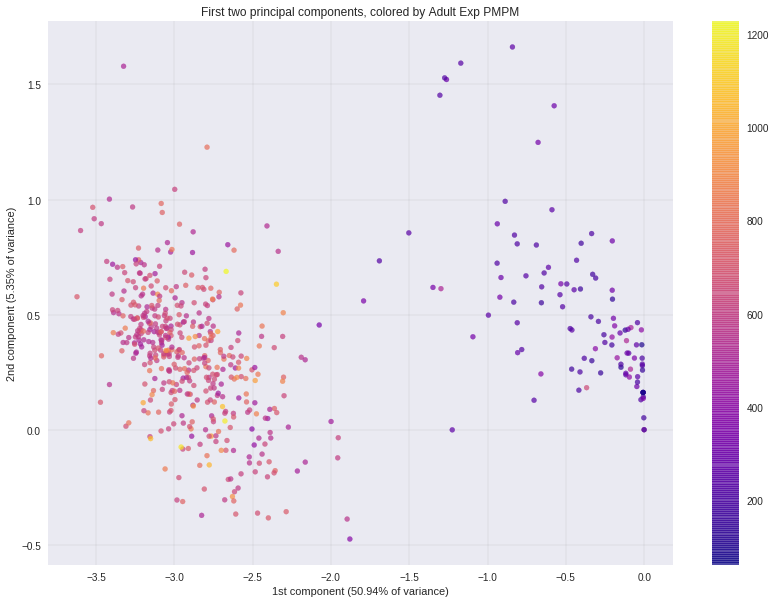

In [0]:
# plt.style.use('seaborn')
# color using the Adult_Exp_PMPM
plt.figure(figsize=(14,10))
plt.scatter(two_d_data[:,0], two_d_data[:,1], alpha=0.7, s=25, c=y, cmap='plasma')
plt.colorbar()

# add title and axis labels
plt.xlabel("1st component (50.94% of variance)")
plt.ylabel("2nd component (5.35% of variance)")
plt.title("First two principal components, colored by Adult Exp PMPM");

# adds major gridlines
plt.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)

In [0]:
# look at what features are being assigned high weight
print(pca.components_[0])
print(pca.components_[1])

[-0.25888998 -0.21648459 -0.28665918 -0.28862592 -0.26000783 -0.179224
 -0.24406908 -0.22973242 -0.26089223 -0.27708005 -0.28229597 -0.16417977
 -0.07882725 -0.13932777 -0.14322526 -0.02603647 -0.10771535 -0.25991372
 -0.23409261 -0.25961429 -0.09434964]
[-0.00414451  0.11480847 -0.15692904 -0.12914289 -0.09399322  0.22459273
  0.23276936  0.275503   -0.18950168 -0.18005236 -0.14478137  0.07404584
  0.20001719  0.21309815  0.16131623  0.64738772  0.10890043 -0.07486689
 -0.10920727 -0.11393544  0.29738799]


In [0]:
# get in abs value
abs_val_two_d_weights_component_1 = np.abs(pca.components_[0])
abs_val_two_d_weights_component_2 = np.abs(pca.components_[1])

ranking_1 = np.argsort(-abs_val_two_d_weights_component_1)
ranking_2 = np.argsort(-abs_val_two_d_weights_component_2)

# now print out the metrics with highest to lowest absolute weight
print(f'First Component, which explains {np.round(pca.explained_variance_ratio_[0]*100, decimals=2)}% of the variance')
print("="*80)
for r in ranking_1:
    print(X.columns[r], ':', pca.components_[0][r])

print('\n\n')
print(f'Second Component, which explains {np.round(pca.explained_variance_ratio_[1]*100, decimals=2)}% of the variance')
print("="*80)
for r in ranking_2:
    print(X.columns[r], ':', pca.components_[1][r])

First Component, which explains 50.95% of the variance
QN09 : -0.28862592162798334
QN08 : -0.2866591756521455
QN41 : -0.28229597005312174
QN40 : -0.2770800541050161
QN39 : -0.26089223250712107
QN10 : -0.2600078279816611
QN60 : -0.2599137199541832
QN69 : -0.2596142866925529
QN02_3 : -0.25888997885577614
QN36 : -0.2440690818243177
QN64 : -0.23409260842563298
QN38 : -0.22973241991879584
QN02_4 : -0.21648458830405395
QN35 : -0.17922399965663344
QN44 : -0.16417976990183106
QN49 : -0.14322526322747156
QN46 : -0.13932777316733272
QN58 : -0.10771535256942089
QN71_1 : -0.09434963827587328
QN45 : -0.07882724560939545
QN55 : -0.026036469357854725



Second Component, which explains 5.35% of the variance
QN55 : 0.647387716031148
QN71_1 : 0.29738798897907165
QN38 : 0.27550300108997716
QN36 : 0.2327693620723804
QN35 : 0.22459273375293046
QN46 : 0.21309815236686533
QN45 : 0.20001718703745341
QN39 : -0.18950167625774544
QN40 : -0.18005236347659484
QN49 : 0.16131622804324483
QN08 : -0.1569290365758286


Let's try coloring by region to see what happens.

In [0]:
colormap = spread_adult_merged['Region'].copy()

In [0]:
colormap.unique()

array(['CPA', 'WPA', 'WV', 'NEPA', 'DE'], dtype=object)

In [0]:
colordict = {'WPA': 0, 'NEPA': 1, 'WV': 2, 'CPA': 3, 'DE': 4}
colormap = colormap.apply(lambda x: colordict[x])
colormap.head()

0    3
1    3
2    0
3    0
4    0
Name: Region, dtype: int64

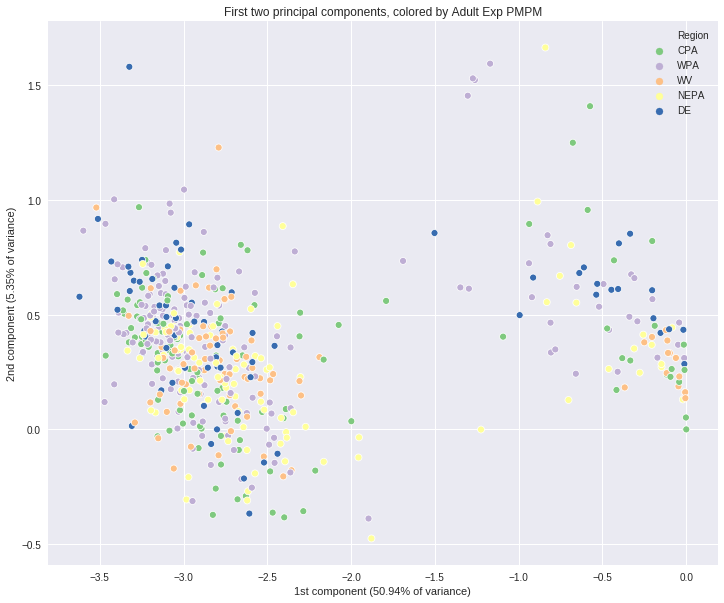

In [0]:
import seaborn as sns

# color by region
plt.figure(figsize=(12,10))
sns.scatterplot(two_d_data[:,0], two_d_data[:,1], hue=colormap, palette="Accent")
# plt.scatter(two_d_data[:,0], two_d_data[:,1], alpha=0.7, c=colormap)

# add title and axis labels
plt.xlabel("1st component (50.94% of variance)")
plt.ylabel("2nd component (5.35% of variance)")
plt.title("First two principal components, colored by Adult Exp PMPM");

# add legend
plt.legend();

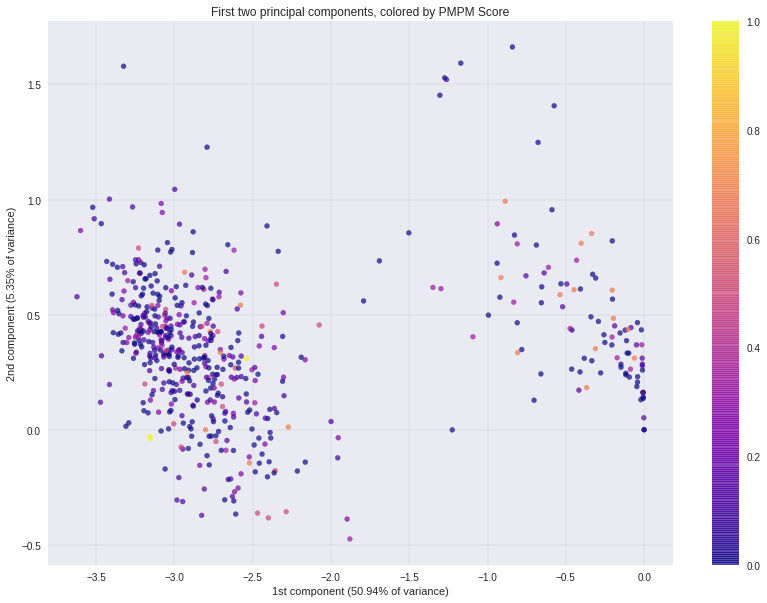

In [0]:
# color using the PMPM_Score
plt.figure(figsize=(14,10))
plt.scatter(two_d_data[:,0], two_d_data[:,1], alpha=0.7, s=25, c=spread_adult_merged.PMPM_Score, cmap='plasma')
plt.colorbar()

# add title and axis labels
plt.xlabel("1st component (50.94% of variance)")
plt.ylabel("2nd component (5.35% of variance)")
plt.title("First two principal components, colored by PMPM Score");

# adds major gridlines
plt.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)

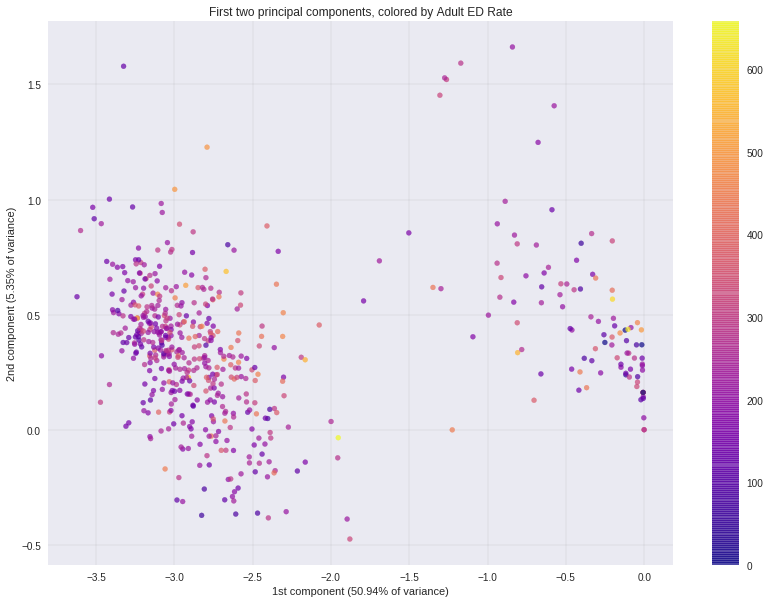

In [0]:

# color using the ED_Score
plt.figure(figsize=(14,10))
plt.scatter(two_d_data[:,0], two_d_data[:,1], alpha=0.7, s=25, c=spread_adult_merged.Adult_ED_Rate, cmap='plasma')
plt.colorbar()

# add title and axis labels
plt.xlabel("1st component (50.94% of variance)")
plt.ylabel("2nd component (5.35% of variance)")
plt.title("First two principal components, colored by Adult ED Rate");

# adds major gridlines
plt.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)

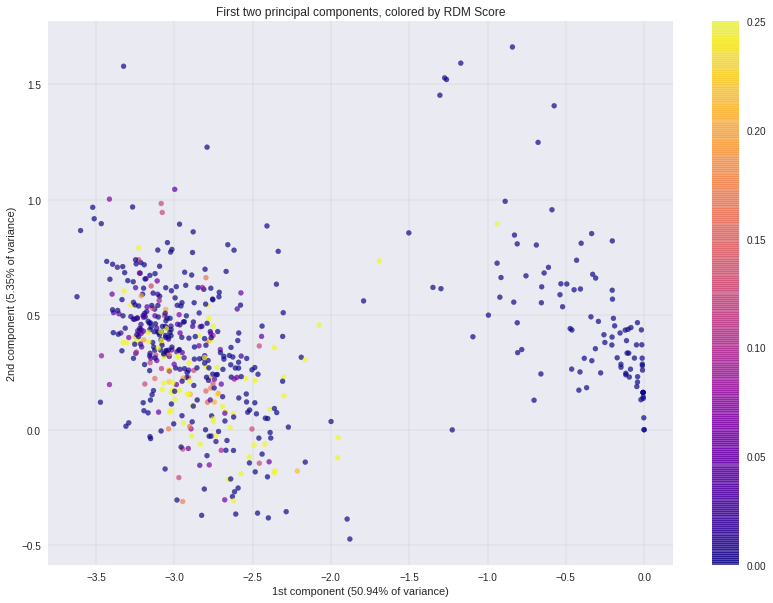

In [0]:

# color using the RDM_Score
plt.figure(figsize=(14,10))
plt.scatter(two_d_data[:,0], two_d_data[:,1], alpha=0.7, s=25, c=spread_adult_merged.RDM_Score, cmap='plasma')
plt.colorbar()

# add title and axis labels
plt.xlabel("1st component (50.94% of variance)")
plt.ylabel("2nd component (5.35% of variance)")
plt.title("First two principal components, colored by RDM Score");

# adds major gridlines
plt.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)

In [0]:
cm = spread_adult_merged.Adult_QA_Score.copy()
cm = cm.apply(lambda x: 0 if x=='.' else float(x))

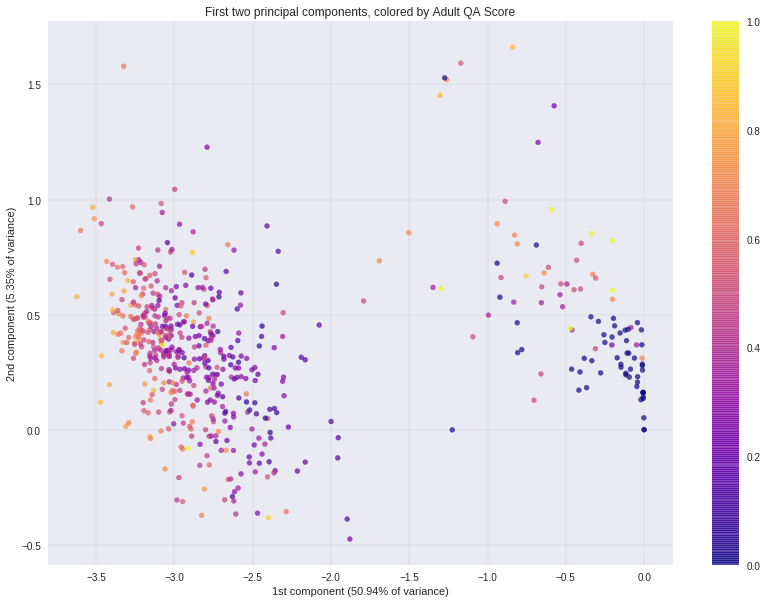

In [0]:

# color using the QA Score
plt.figure(figsize=(14,10))
plt.scatter(two_d_data[:,0], two_d_data[:,1], alpha=0.7, s=25, c=cm.values, cmap='plasma')
plt.colorbar()

# add title and axis labels
plt.xlabel("1st component (50.94% of variance)")
plt.ylabel("2nd component (5.35% of variance)")
plt.title("First two principal components, colored by Adult QA Score");

# adds major gridlines
plt.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)

# Pediatric version

## Prep

In [0]:
metrics = pd.read_excel('data/metrics.xlsx')
metrics.head()

,EntityID,Program,Region,Population,Order,Class,ID,Name,Weight,Key_Master,Denominator,Numerator,Trend_Numerator,Gaps_Population,Predicted_Numerator,Observed,Expected,Rate,Min,Mid,Max,Metric,Points,Count,Total_Metrics,Total_Scored,Total_Points,Score,Total
0,Provider 1,TP,WPA,Adult,1,Static,QN02_3,Comprehensive Diabetes Care: Medical Attention...,1.0,QN02_3,745.0,703.0,NaN,NaN,NaN,NaN,NaN,0.94,0.90,0.92,0.97,0.7,0.7,1.0,17,11.7,11.7,69,17
1,Provider 1,TP,WPA,Adult,2,Static,QN02_4,Comprehensive Diabetes Care: Eye Exam (retinal...,1.0,QN02_4,745.0,498.0,NaN,NaN,NaN,NaN,NaN,0.67,0.52,0.57,0.65,1.0,1.0,1.0,17,11.7,11.7,69,17
2,Provider 1,TP,WPA,Adult,3,Static,QN08,Breast Cancer Screening,1.0,QN08,1998.0,1724.0,NaN,NaN,NaN,NaN,NaN,0.86,0.79,0.82,0.86,1.0,1.0,1.0,17,11.7,11.7,69,17
3,Provider 1,TP,WPA,Adult,4,Static,QN09,Colorectal Cancer Screening,1.0,QN09,3913.0,3186.0,NaN,NaN,NaN,NaN,NaN,0.81,0.68,0.70,0.75,1.0,1.0,1.0,17,11.7,11.7,69,17
4,Provider 1,TP,WPA,Adult,5,Static,QN10,Cervical Cancer Screening,1.0,QN10,3781.0,3081.0,NaN,NaN,NaN,NaN,NaN,0.81,0.77,0.79,0.82,0.7,0.7,1.0,17,11.7,11.7,69,17


In [0]:
metrics.columns

Index(['EntityID', 'Program', 'Region', 'Population', 'Order', 'Class', 'ID',
       'Name', 'Weight', 'Key_Master', 'Denominator', 'Numerator',
       'Trend_Numerator', 'Gaps_Population', 'Predicted_Numerator', 'Observed',
       'Expected', 'Rate', 'Min', 'Mid', 'Max', 'Metric', 'Points', 'Count',
       'Total_Metrics', 'Total_Scored', 'Total_Points', 'Score', 'Total'],
      dtype='object')

In [0]:
# len(metrics[metrics['Denominator'] > 300])
len(metrics)

38488

In [0]:
data = metrics.copy()
data = data[['EntityID', 'Region', 'Population', 'ID', 'Name', 'Denominator', 'Rate', 'Score']]
data.head()

,EntityID,Region,Population,ID,Name,Denominator,Rate,Score
0,Provider 1,WPA,Adult,QN02_3,Comprehensive Diabetes Care: Medical Attention...,745.0,0.94,69
1,Provider 1,WPA,Adult,QN02_4,Comprehensive Diabetes Care: Eye Exam (retinal...,745.0,0.67,69
2,Provider 1,WPA,Adult,QN08,Breast Cancer Screening,1998.0,0.86,69
3,Provider 1,WPA,Adult,QN09,Colorectal Cancer Screening,3913.0,0.81,69
4,Provider 1,WPA,Adult,QN10,Cervical Cancer Screening,3781.0,0.81,69


In [0]:
# change ID to an integer so we can use as a decent index
data['EntityID'] = data['EntityID'].apply(lambda x: int(x.split()[1]))

In [0]:
data.head()

,EntityID,Region,Population,ID,Name,Denominator,Rate,Score
0,1,WPA,Adult,QN02_3,Comprehensive Diabetes Care: Medical Attention...,745.0,0.94,69
1,1,WPA,Adult,QN02_4,Comprehensive Diabetes Care: Eye Exam (retinal...,745.0,0.67,69
2,1,WPA,Adult,QN08,Breast Cancer Screening,1998.0,0.86,69
3,1,WPA,Adult,QN09,Colorectal Cancer Screening,3913.0,0.81,69
4,1,WPA,Adult,QN10,Cervical Cancer Screening,3781.0,0.81,69


In [0]:
ped = data[data['Population']=='Pediatric']
ped.head()

,EntityID,Region,Population,ID,Name,Denominator,Rate,Score
15282,1,WPA,Pediatric,QN01,Appropriate treatment for children with URI,108.0,0.95,68
15283,1,WPA,Pediatric,QN05,Adolescent Well-Care Visits,1666.0,0.83,68
15284,1,WPA,Pediatric,QN12_6,Well-Child Visits in the First 15 Months of Li...,55.0,0.96,68
15285,1,WPA,Pediatric,QN13,"Well-Child Visits in the Third, Fourth, Fifth ...",403.0,0.95,68
15286,1,WPA,Pediatric,QN54,Childhood Immunization Status: Combination 10,72.0,0.60,68


In [0]:
spread_ped = ped.pivot(index='EntityID', columns='ID', values='Rate')
spread_ped.head()

ID,QN01,QN05,QN12_6,QN13,QN34_3,QN54,QN57_2,QN58,QN61,QN75,QN77
EntityID,,,,,,,,,,,
1,0.95,0.83,0.96,0.95,0.78,0.60,0.57,0.43,0.22,0.67,1.00
2,0.98,0.72,0.91,0.92,0.64,0.47,0.32,0.46,0.20,0.16,0.97
3,0.91,0.66,0.88,0.92,0.63,0.47,0.23,0.60,0.68,0.19,0.98
4,0.94,0.62,0.88,0.87,0.03,0.54,0.28,0.34,0.40,0.33,0.99
5,0.50,0.79,1.00,0.75,0.00,1.00,0.00,0.00,0.00,1.00,1.00


In [0]:
# now get reim data so we can stitch them together
reim = pd.read_csv('data/reimbursements.csv')
reim.head()

,EntityID,Region,Quality\r\nScore,Quality\r\nThreshold,PMPM\r\nScore,ED\r\nScore,RDM\r\nScore,CU\r\nScore,RM\r\nScore,Commercial\r\nMems,Medicare\r\nAdvantage\r\nMems,Active\r\nEnrollment,Commercial\r\nPotential $,Medicare\r\nAdvantage\r\nPotential $,Total\r\nPotential $,QA\r\nPotential $,CU\r\nPotential $,RM\r\nPotential $,QA\r\nEarned $,CU\r\nEarned $,RM\r\nEarned $,Total\r\nEarned $,% of\r\n$ Earned,QA\r\nMissed $,CU\r\nMissed $,RM\r\nMissed $,Total\r\nMissed $,Adult\r\nQA Score,Adult\r\nQA Mems,Peds\r\nQA Score,Peds\r\nQA Mems,Senior\r\nQA Score,Senior\r\nQA Mems,Composite\r\nMems,Composite\r\nPMPM,Composite\r\nRisk,Composite\r\nMrk PMPM,Composite\r\nExp PMPM,Composite\r\nPerformance,Total\r\nPMPM Pts,Adult\r\nMems,Adult\r\nPMPM,Adult\r\nRisk,Adult\r\nMrk PMPM,Adult\r\nMrk Risk,Adult\r\nExp PMPM,Adult\r\nPerformance,Children\r\nMems,Children\r\nPMPM,Children\r\nRisk,...,Weighted\r\nED,Total\r\nED Pts,Adult\r\nED Mems,Adult\r\nED Rate,Adult\r\nWeighted ED,Adult\r\nED Pts,Adult\r\nED 80th %,Adult\r\nED 50th %,Adult\r\nED 30th %,Peds\r\nED Mems,Peds\r\nED Rate,Peds\r\nWeighted ED,Peds\r\nED Pts,Peds\r\nED 80th %,Peds\r\nED 50th %,Peds\r\nED 30th %,Senior\r\nED Mems,Senior\r\nED Rate,Senior\r\nWeighted ED,Senior\r\nED Pts,Senior\r\nED 80th %,Senior\r\nED 50th %,Senior\r\nED 30th %,Total\r\nRDM Mems,Weighted\r\nRDM,Total\r\nRDM Pts,Adult\r\nRDM Mems,Adult\r\nRDM Rate,Adult\r\nWeighted RDM,Adult\r\nRDM Pts,Adult\r\nRDM Max,Adult\r\nRDM Mid,Adult\r\nRDM Min,Senior\r\nRDM Mems,Senior\r\nRDM Rate,Senior\r\nWeighted RDM,Senior\r\nRDM Pts,Senior\r\nRDM Max,Senior\r\nRDM Mid,Senior\r\nRDM Min,RM\r\nType,RM\r\nAligned %,RM\r\nBaseline %,RM\r\nPerformance,RM\r\nPts,RM\r\nTarget,WPA\r\n90th %,Comm Adult/Ped\r\nMems,FEP\r\nMems,BDTC\r\nMems
0,Provider 3,CPA,0.49,0.76,0.10,0.0675,0.0300,0.20,.,9271,803,0.85,667530,115608,783138,261046,522092,0,127913,104418,0,232331,0.30,133133,417674,0,550807,0.36,4783.33330,0.28,1697.8333,0.78,1584.50000,6307.500000,555.21,1.353398,582.74204,563.19,-0.0142,0.2,4037.833300,607.91,1.779344,629.53674,1.802636,621.40,-0.0217,1440.166700,184.43,0.500265,...,1701.55,0.27,3889.166700,216,777.83333,0.2,136,186,225,1466.833300,140,733.41667,0.5,124,164,199,951.500000,249,190.30000,0.2,185,224,262,6367.83330,792.25,0.12,4783.33330,1.12,0,0,0,0.34,0.48,1584.50000,0.57,792.25,0.5,0.41,0.65,0.81,NaN,.,.,.,.,NaN,.,5505,1758,2008
1,Provider 5,WPA,0.57,0.85,0.00,0.1575,0.0125,0.17,0.15,588,112,0.68,42330,16176,58506,19502,24894,14110,11116,4232,2117,17465,0.30,8386,20662,11993,41041,0.51,416.00000,1,39.833333,0.6,139.83333,561.833330,686.56,1.597966,632.03536,644.53,0.0652,0.0,410.666670,633.71,1.901006,600.78790,2.020118,565.36,0.1209,38.833333,114.28,0.358189,...,326.91667,0.63,392.166670,242,196.08333,0.5,211,250,289,38.833333,258,0.00000,0,196,269,301,130.833330,260,130.83333,1,266,320,365,555.83333,27.966667,0.05,416.00000,0.55,0,0,0,0.34,0.48,139.83333,0.81,27.966667,0.2,0.41,0.65,0.81,Admissions,0.92,0.83,0.09,0.15,Min,1,450,34,105
2,Provider 6,WPA,0.65,0.83,0.25,0.1350,0.0000,0.39,1,281,277,0.76,20238,39924,60162,20054,33362,6746,13035,13011,6746,32792,0.55,7019,20351,0,27370,0.57,238.83333,.,0,0.68,282.75000,518.750000,642.98,1.150721,632.91498,692.82,-0.0719,0.5,236.333330,440.51,1.662479,590.81057,2.020118,486.21,-0.0940,5.166667,179.97,0.578742,...,279.75,0.54,233.833330,291,0.00000,0.0,211,250,289,5.166667,0,0.00000,0,196,269,301,279.750000,172,279.75000,1,266,320,365,521.58333,0,0,238.83333,1.88,0,0,0,0.34,0.48,282.75000,1.03,0,0,0.41,0.65,0.81,Admissions,1,0.86,0.14,1,Max Performance,1,242,8,32
3,Provider 9,WV,0.30,0.45,0.00,0.0000,0.0000,0.00,.,191,0,0.78,13758,0,13758,4586,9172,0,1376,0,0,1376,0.10,3210,9172,0,12382,0.27,92.50000,0.4,23.5,.,0.00000,94.916667,753.84,1.895903,722.20876,731.70,0.0303,0.0,78.416667,823.01,2.077100,833.59603,2.167160,798.95,0.0301,16.500000,425.12,1.034763,...,.,.,75.583333,490,0.00000,0.0,204,272,336,16.500000,364,0.00000,0,173,232,301,2.833333,0,0.00000,0,183,347,362,0.000

In [0]:
reim.columns = [x.replace('\r\n','_') for x in reim.columns]
reim.columns = [x.replace(' ','_') for x in reim.columns]
reim.columns

Index(['EntityID', 'Region', 'Quality_Score', 'Quality_Threshold',
       'PMPM_Score', 'ED_Score', 'RDM_Score', 'CU_Score', 'RM_Score',
       'Commercial_Mems',
       ...
       'RM_Type', 'RM_Aligned_%', 'RM_Baseline_%', 'RM_Performance', 'RM_Pts',
       'RM_Target', 'WPA_90th_%', 'Comm_Adult/Ped_Mems', 'FEP_Mems',
       'BDTC_Mems'],
      dtype='object', length=119)

In [0]:
reim['EntityID'] = reim['EntityID'].apply(lambda x: int(x.split()[1]))

In [0]:
# For now we're only interested in high-level outcomes.
reim = reim[['EntityID',
             'Region',
             'Quality_Score',
            #  'Quality_Threshold',
             'PMPM_Score',
             'ED_Score',
             'RDM_Score',
            #  'Total_Potential_$',
            #  'QA_Potential_$',
            #  'QA_Earned_$',
            #  'QA_Missed_$',
            #  'Adult_QA_Score',
             'Peds_QA_Score',
#              'Senior_QA_Score',
             'Children_PMPM',
             'Children_Exp_PMPM',
             'Peds_ED_Rate'
             ]]
reim.head()

,EntityID,Region,Quality_Score,PMPM_Score,ED_Score,RDM_Score,Peds_QA_Score,Children_PMPM,Children_Exp_PMPM,Peds_ED_Rate
0,3,CPA,0.49,0.10,0.0675,0.0300,0.28,184.43,181.94,140
1,5,WPA,0.57,0.00,0.1575,0.0125,1,114.28,117.01,258
2,6,WPA,0.65,0.25,0.1350,0.0000,.,179.97,171.5,0
3,9,WV,0.30,0.00,0.0000,0.0000,0.4,425.12,412.05,364
4,10,WPA,0.52,0.00,0.2500,0.2500,1,665.56,448.92,714


In [0]:
spread_ped_merged = pd.merge(spread_ped, reim,
                              left_on='EntityID',
                              right_on='EntityID')
spread_ped_merged.head()

,EntityID,QN01,QN05,QN12_6,QN13,QN34_3,QN54,QN57_2,QN58,QN61,QN75,QN77,Region,Quality_Score,PMPM_Score,ED_Score,RDM_Score,Peds_QA_Score,Children_PMPM,Children_Exp_PMPM,Peds_ED_Rate
0,2,0.98,0.72,0.91,0.92,0.64,0.47,0.32,0.46,0.20,0.16,0.97,CPA,0.67,0.10,0.1450,0.0100,0.43,199.14,191.72,163
1,3,0.91,0.66,0.88,0.92,0.63,0.47,0.23,0.60,0.68,0.19,0.98,CPA,0.49,0.10,0.0675,0.0300,0.28,184.43,181.94,140
2,5,0.50,0.79,1.00,0.75,0.00,1.00,0.00,0.00,0.00,1.00,1.00,WPA,0.57,0.00,0.1575,0.0125,1,114.28,117.01,258
3,6,0.00,0.67,0.00,0.00,0.20,0.00,0.00,0.00,0.00,0.00,0.00,WPA,0.65,0.25,0.1350,0.0000,.,179.97,171.5,0
4,7,0.85,0.74,0.86,0.80,0.01,0.00,0.29,0.60,0.08,0.40,1.00,WPA,0.67,0.00,0.1225,0.0000,0.22,251.13,208.36,321


In [0]:
spread_ped_merged.to_csv('data/pediatric_spread_data.csv', index=False)

## Analysis

In [0]:
spread_ped_merged = pd.read_csv('data/pediatric_spread_data.csv', na_values=['.'])
sam = spread_ped_merged.copy()
ind_var_index = [i for i in range(1,12)]
sam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 548 entries, 0 to 547
Data columns (total 21 columns):
EntityID             548 non-null int64
QN01                 535 non-null float64
QN05                 535 non-null float64
QN12_6               535 non-null float64
QN13                 535 non-null float64
QN34_3               535 non-null float64
QN54                 535 non-null float64
QN57_2               535 non-null float64
QN58                 535 non-null float64
QN61                 535 non-null float64
QN75                 535 non-null float64
QN77                 535 non-null float64
Region               548 non-null object
Quality_Score        548 non-null float64
PMPM_Score           548 non-null float64
ED_Score             548 non-null float64
RDM_Score            548 non-null float64
Peds_QA_Score        427 non-null float64
Children_PMPM        548 non-null float64
Children_Exp_PMPM    477 non-null float64
Peds_ED_Rate         477 non-null float64
dtypes: float64(

In [0]:
sam.fillna(value=0.0, inplace=True)

In [0]:
import statsmodels.api as sm
X = sam.iloc[:,1:12]    # set X - independent vars
y = sam['RDM_Score']
X = sm.add_constant(X)

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [0]:
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              RDM_Score   R-squared:                       0.071
Model:                            OLS   Adj. R-squared:                  0.052
Method:                 Least Squares   F-statistic:                     3.739
Date:                Wed, 11 Dec 2019   Prob (F-statistic):           3.64e-05
Time:                        23:09:36   Log-Likelihood:                 571.85
No. Observations:                 548   AIC:                            -1120.
Df Residuals:                     536   BIC:                            -1068.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0658      0.010      6.589      0.000       0.046       0.085
QN01          -0.0234      0.013     -1.869      0.062      -0.048       0.001
QN05           0.0012      0.019      0.063      0.950      -0.036       0.038
QN12_6        -0.0142      0.014     -1.031      0.303      -0.041       0.013
QN13          -0.0105      0.015     -0.709      0.479      -0.040       0.019
QN34_3        -0.0056      0.018     -0.309      0.758      -0.041       0.030
QN54          -0.0283      0.020     -1.401      0.162      -0.068       0.011
QN57_2        -0.0038      0.019     -0.193      0.847      -0.042       0.035
QN58          -0.0225      0.014     -1.654      0.099      -0.049       0.004
QN61           0.0003      0.016      0.022      0.982      -0.030       0.031
QN75          -0.0071      0.016     -0.445      0.657      -0.039       0.024
QN77           0.0295      0.012      2.526      0.012       0.007       0.052
==============================================================================
Omnibus:                      112.859   Durbin-Watson:                   2.023
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              183.148
Skew:                           1.380   Prob(JB):                     1.70e-40
Kurtosis:                       3.632   Cond. No.                         10.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [0]:
from sklearn.decomposition import PCA

In [0]:
X = sam.iloc[:,1:12]    # set X - independent vars
y = sam['Children_Exp_PMPM']

In [0]:
for code in X.columns:
    v = X[code].value_counts()
    if 0 in v.index and v[0] > 0.6*sum(v):
        X.drop(columns=code, inplace=True)
        
X.columns

Index(['QN01', 'QN05', 'QN12_6', 'QN13', 'QN34_3', 'QN57_2', 'QN75', 'QN77'], dtype='object')

In [0]:
# need to center the data
X.describe()

,QN01,QN05,QN12_6,QN13,QN34_3,QN57_2,QN75,QN77
count,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000
mean,0.489270,0.562482,0.422026,0.542190,0.117993,0.158011,0.219909,0.649142
std,0.439372,0.234859,0.455739,0.427483,0.230354,0.220094,0.329654,0.470421
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.427500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.670000,0.600000,0.000000,0.770000,0.010000,0.000000,0.000000,1.000000
75%,0.930000,0.750000,0.930000,0.920000,0.082500,0.290000,0.410000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [0]:
from sklearn.preprocessing import StandardScaler
sc_X = pd.DataFrame(StandardScaler().fit_transform(X), columns=X.columns)
sc_X.describe()

,QN01,QN05,QN12_6,QN13,QN34_3,QN57_2,QN75,QN77
count,5.480000e+02,5.480000e+02,5.480000e+02,5.480000e+02,5.480000e+02,5.480000e+02,5.480000e+02,5.480000e+02
mean,8.893940e-17,7.280774e-18,5.437662e-16,1.922631e-16,7.688497e-17,4.955485e-16,2.038110e-16,4.396321e-16
std,1.000914e+00,1.000914e+00,1.000914e+00,1.000914e+00,1.000914e+00,1.000914e+00,1.000914e+00,1.000914e+00
min,-1.114584e+00,-2.397165e+00,-9.268706e-01,-1.269490e+00,-5.126918e-01,-7.185794e-01,-6.676989e-01,-1.381180e+00
25%,-1.114584e+00,-5.752605e-01,-9.268706e-01,-1.269490e+00,-5.126918e-01,-7.185794e-01,-6.676989e-01,-1.381180e+00
50%,4.117128e-01,1.598940e-01,-9.268706e-01,5.333979e-01,-4.692407e-01,-7.185794e-01,-6.676989e-01,7.465196e-01
75%,1.004007e+00,7.991587e-01,1.115635e+00,8.846099e-01,-1.542199e-01,6.002407e-01,5.771653e-01,7.465196e-01
max,1.163471e+00,1.864600e+00,1.269372e+00,1.071923e+00,3.832423e+00,3.829076e+00,2.368555e+00,7.465196e-01


In [0]:
pca = PCA(n_components=2)
pca.fit(sc_X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [0]:
print(pca.explained_variance_ratio_)

[0.52021264 0.11244049]


In [0]:
two_d_data = pca.transform(X)

In [0]:
two_d_data.shape

(548, 2)

In [0]:
y.shape

(548,)

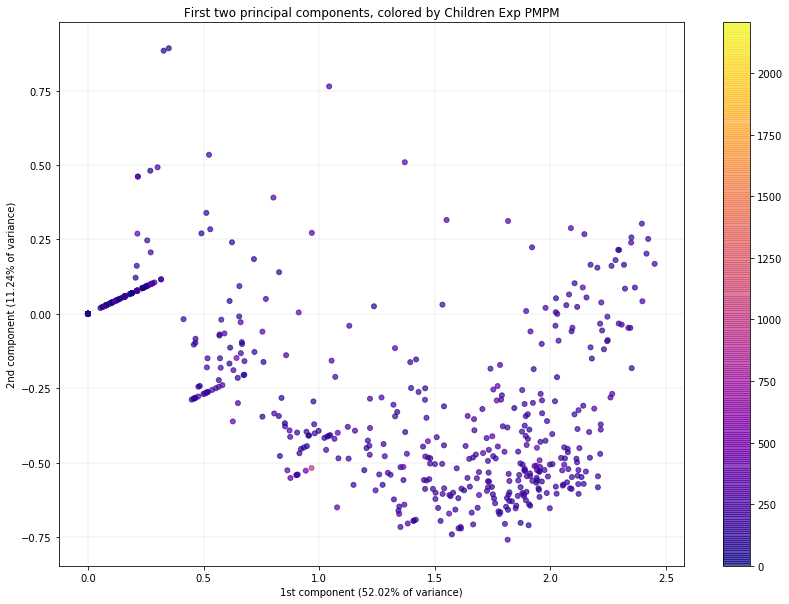

In [0]:
# plt.style.use('seaborn')
# color using the Adult_Exp_PMPM
plt.figure(figsize=(14,10))
plt.scatter(two_d_data[:,0], two_d_data[:,1], alpha=0.7, s=25, c=y, cmap='plasma')
plt.colorbar()

# add title and axis labels
plt.xlabel(f"1st component ({np.round(pca.explained_variance_ratio_[0]*100, 2)}% of variance)")
plt.ylabel(f"2nd component ({np.round(pca.explained_variance_ratio_[1]*100, 2)}% of variance)")
plt.title("First two principal components, colored by Children Exp PMPM");

# adds major gridlines
plt.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)

In [0]:
# look at what features are being assigned high weight
print(pca.components_[0])
print(pca.components_[1])

[0.38575043 0.31594193 0.41307996 0.42218088 0.22303801 0.2918239
 0.3449924  0.38545901]
[-0.27857113  0.11585668 -0.0614649  -0.18432741  0.84622354  0.19740446
  0.13844406 -0.31143421]


In [0]:
# get in abs value
abs_val_two_d_weights_component_1 = np.abs(pca.components_[0])
abs_val_two_d_weights_component_2 = np.abs(pca.components_[1])

ranking_1 = np.argsort(-abs_val_two_d_weights_component_1)
ranking_2 = np.argsort(-abs_val_two_d_weights_component_2)

# now print out the metrics with highest to lowest absolute weight
print(f'First Component, which explains {np.round(pca.explained_variance_ratio_[0]*100, decimals=2)}% of the variance')
print("="*80)
for r in ranking_1:
    print(X.columns[r], ':', pca.components_[0][r])

print('\n\n')
print(f'Second Component, which explains {np.round(pca.explained_variance_ratio_[1]*100, decimals=2)}% of the variance')
print("="*80)
for r in ranking_2:
    print(X.columns[r], ':', pca.components_[1][r])

First Component, which explains 52.02% of the variance
QN13 : 0.42218088114277325
QN12_6 : 0.4130799616554425
QN01 : 0.38575042930292985
QN77 : 0.3854590148116729
QN75 : 0.3449924048946113
QN05 : 0.31594192943137844
QN57_2 : 0.29182389894748606
QN34_3 : 0.22303800766812568



Second Component, which explains 11.24% of the variance
QN34_3 : 0.8462235409302716
QN77 : -0.31143421011803957
QN01 : -0.2785711257228854
QN57_2 : 0.19740446334441064
QN13 : -0.1843274138594686
QN75 : 0.13844405607479082
QN05 : 0.11585668284833904
QN12_6 : -0.06146490206283878


Let's try coloring by region to see what happens.

In [0]:
colormap = spread_ped_merged['Region'].copy()

In [0]:
colormap.unique()

array(['CPA', 'WPA', 'WV', 'NEPA', 'DE'], dtype=object)

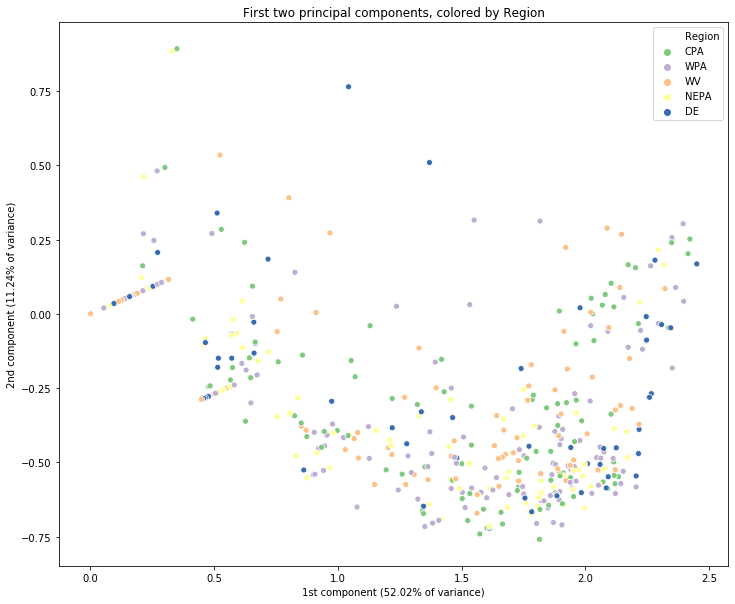

In [0]:
import seaborn as sns

# color by region
plt.figure(figsize=(12,10))
sns.scatterplot(two_d_data[:,0], two_d_data[:,1], hue=colormap, palette="Accent")
# plt.scatter(two_d_data[:,0], two_d_data[:,1], alpha=0.7, c=colormap)

# add title and axis labels
plt.xlabel(f"1st component ({np.round(pca.explained_variance_ratio_[0]*100, 2)}% of variance)")
plt.ylabel(f"2nd component ({np.round(pca.explained_variance_ratio_[1]*100, 2)}% of variance)")
plt.title("First two principal components, colored by Region");

# add legend
plt.legend();

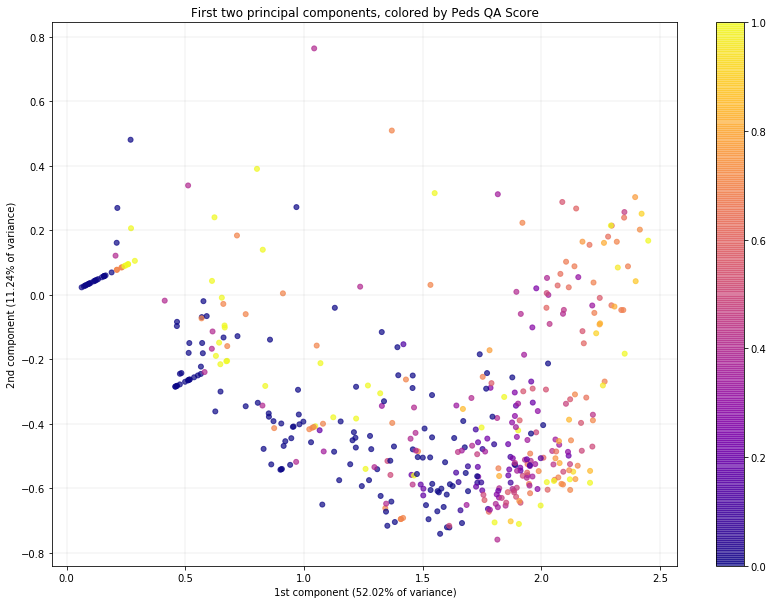

In [0]:
# color using the QA_Score
plt.figure(figsize=(14,10))
plt.scatter(two_d_data[:,0], two_d_data[:,1], alpha=0.7, s=25, c=spread_ped_merged.Peds_QA_Score, cmap='plasma')
plt.colorbar()

# add title and axis labels
plt.xlabel(f"1st component ({np.round(pca.explained_variance_ratio_[0]*100, 2)}% of variance)")
plt.ylabel(f"2nd component ({np.round(pca.explained_variance_ratio_[1]*100, 2)}% of variance)")
plt.title("First two principal components, colored by Peds QA Score");

# adds major gridlines
plt.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)

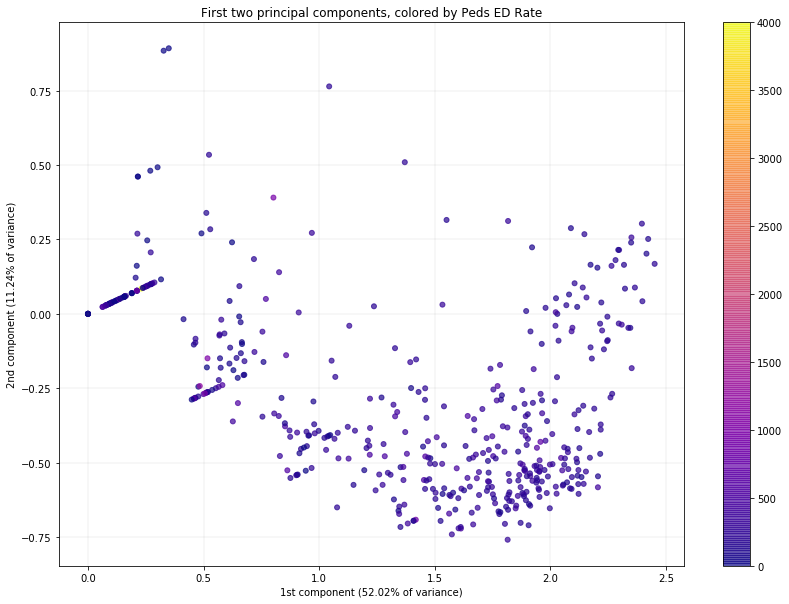

In [0]:

# color using the ED_Score
plt.figure(figsize=(14,10))
plt.scatter(two_d_data[:,0], two_d_data[:,1], alpha=0.7, s=25, c=spread_ped_merged.Peds_ED_Rate, cmap='plasma')
plt.colorbar()

# add title and axis labels
plt.xlabel(f"1st component ({np.round(pca.explained_variance_ratio_[0]*100, 2)}% of variance)")
plt.ylabel(f"2nd component ({np.round(pca.explained_variance_ratio_[1]*100, 2)}% of variance)")
plt.title("First two principal components, colored by Peds ED Rate");

# adds major gridlines
plt.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)

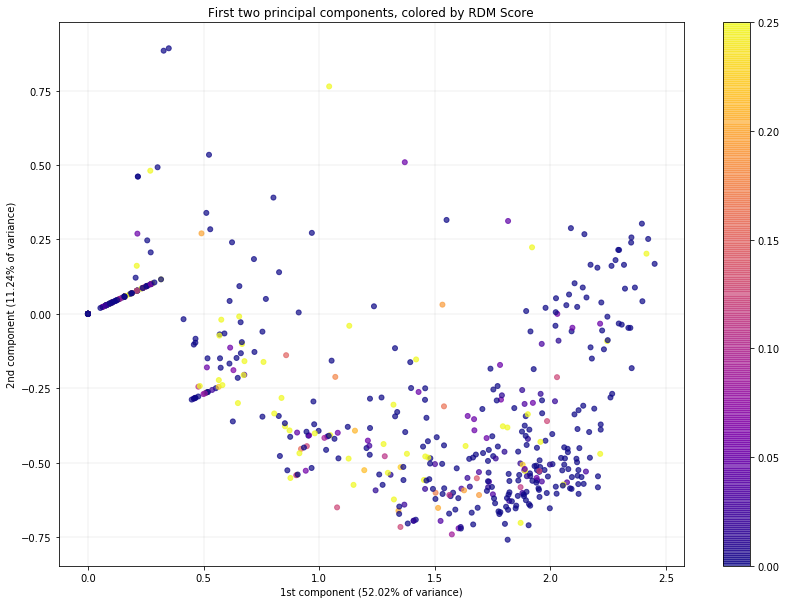

In [0]:

# color using the RDM_Score
plt.figure(figsize=(14,10))
plt.scatter(two_d_data[:,0], two_d_data[:,1], alpha=0.7, s=25, c=spread_ped_merged.RDM_Score, cmap='plasma')
plt.colorbar()

# add title and axis labels
plt.xlabel(f"1st component ({np.round(pca.explained_variance_ratio_[0]*100, 2)}% of variance)")
plt.ylabel(f"2nd component ({np.round(pca.explained_variance_ratio_[1]*100, 2)}% of variance)")
plt.title("First two principal components, colored by RDM Score");

# adds major gridlines
plt.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)

# Senior version

## Prep

In [0]:
metrics = pd.read_excel('data/metrics.xlsx')
metrics.head()

,EntityID,Program,Region,Population,Order,Class,ID,Name,Weight,Key_Master,Denominator,Numerator,Trend_Numerator,Gaps_Population,Predicted_Numerator,Observed,Expected,Rate,Min,Mid,Max,Metric,Points,Count,Total_Metrics,Total_Scored,Total_Points,Score,Total
0,Provider 1,TP,WPA,Adult,1,Static,QN02_3,Comprehensive Diabetes Care: Medical Attention...,1.0,QN02_3,745.0,703.0,NaN,NaN,NaN,NaN,NaN,0.94,0.90,0.92,0.97,0.7,0.7,1.0,17,11.7,11.7,69,17
1,Provider 1,TP,WPA,Adult,2,Static,QN02_4,Comprehensive Diabetes Care: Eye Exam (retinal...,1.0,QN02_4,745.0,498.0,NaN,NaN,NaN,NaN,NaN,0.67,0.52,0.57,0.65,1.0,1.0,1.0,17,11.7,11.7,69,17
2,Provider 1,TP,WPA,Adult,3,Static,QN08,Breast Cancer Screening,1.0,QN08,1998.0,1724.0,NaN,NaN,NaN,NaN,NaN,0.86,0.79,0.82,0.86,1.0,1.0,1.0,17,11.7,11.7,69,17
3,Provider 1,TP,WPA,Adult,4,Static,QN09,Colorectal Cancer Screening,1.0,QN09,3913.0,3186.0,NaN,NaN,NaN,NaN,NaN,0.81,0.68,0.70,0.75,1.0,1.0,1.0,17,11.7,11.7,69,17
4,Provider 1,TP,WPA,Adult,5,Static,QN10,Cervical Cancer Screening,1.0,QN10,3781.0,3081.0,NaN,NaN,NaN,NaN,NaN,0.81,0.77,0.79,0.82,0.7,0.7,1.0,17,11.7,11.7,69,17


In [0]:
metrics.columns

Index(['EntityID', 'Program', 'Region', 'Population', 'Order', 'Class', 'ID',
       'Name', 'Weight', 'Key_Master', 'Denominator', 'Numerator',
       'Trend_Numerator', 'Gaps_Population', 'Predicted_Numerator', 'Observed',
       'Expected', 'Rate', 'Min', 'Mid', 'Max', 'Metric', 'Points', 'Count',
       'Total_Metrics', 'Total_Scored', 'Total_Points', 'Score', 'Total'],
      dtype='object')

In [0]:
# len(metrics[metrics['Denominator'] > 300])
len(metrics)

38488

In [0]:
data = metrics.copy()
data = data[['EntityID', 'Region', 'Population', 'ID', 'Name', 'Denominator', 'Rate', 'Score']]
data.head()

,EntityID,Region,Population,ID,Name,Denominator,Rate,Score
0,Provider 1,WPA,Adult,QN02_3,Comprehensive Diabetes Care: Medical Attention...,745.0,0.94,69
1,Provider 1,WPA,Adult,QN02_4,Comprehensive Diabetes Care: Eye Exam (retinal...,745.0,0.67,69
2,Provider 1,WPA,Adult,QN08,Breast Cancer Screening,1998.0,0.86,69
3,Provider 1,WPA,Adult,QN09,Colorectal Cancer Screening,3913.0,0.81,69
4,Provider 1,WPA,Adult,QN10,Cervical Cancer Screening,3781.0,0.81,69


In [0]:
# change ID to an integer so we can use as a decent index
data['EntityID'] = data['EntityID'].apply(lambda x: int(x.split()[1]))

In [0]:
data.head()

,EntityID,Region,Population,ID,Name,Denominator,Rate,Score
0,1,WPA,Adult,QN02_3,Comprehensive Diabetes Care: Medical Attention...,745.0,0.94,69
1,1,WPA,Adult,QN02_4,Comprehensive Diabetes Care: Eye Exam (retinal...,745.0,0.67,69
2,1,WPA,Adult,QN08,Breast Cancer Screening,1998.0,0.86,69
3,1,WPA,Adult,QN09,Colorectal Cancer Screening,3913.0,0.81,69
4,1,WPA,Adult,QN10,Cervical Cancer Screening,3781.0,0.81,69


In [0]:
sen = data[data['Population']=='Senior']
sen.head()

,EntityID,Region,Population,ID,Name,Denominator,Rate,Score
21508,1,WPA,Senior,QN02_3,Comprehensive Diabetes Care: Medical Attention...,646.0,0.99,94
21509,1,WPA,Senior,QN02_4,Comprehensive Diabetes Care: Eye Exam (retinal...,646.0,0.87,94
21510,1,WPA,Senior,QN08,Breast Cancer Screening,1262.0,0.89,94
21511,1,WPA,Senior,QN09,Colorectal Cancer Screening,2520.0,0.87,94
21512,1,WPA,Senior,QN35,Adult BMI Assessment,2329.0,1.00,94


In [0]:
spread_sen = sen.pivot(index='EntityID', columns='ID', values='Rate')
spread_sen.head()

ID,QN02_3,QN02_4,QN08,QN09,QN27,QN28,QN35,QN36,QN38,QN39,QN40,QN41,QN43,QN44,QN45,QN51,QN60,QN63,QN64,QN66,QN67,QN68,QN69,QN70,QN71_1,QN71_2,QN71_3,QN76,QN77,QN78
EntityID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0.99,0.87,0.89,0.87,0.74,0.50,1.00,0.87,0.61,0.89,0.89,0.88,0.81,0.89,0.71,0.88,0.95,0.88,0.89,0.75,0.01,1.49,0.88,0.01,0.08,0.00,0.00,0.41,0.93,0.07
2,0.97,0.85,0.82,0.82,0.21,0.08,1.00,0.89,0.51,0.90,0.90,0.87,0.56,0.82,0.75,0.69,0.83,0.89,0.89,0.85,0.03,1.08,0.87,0.02,0.10,0.01,0.00,0.03,0.91,0.07
3,0.98,0.76,0.80,0.78,0.46,0.68,0.98,0.92,0.81,0.87,0.88,0.88,0.43,0.89,0.57,0.19,0.90,0.78,0.82,0.77,0.02,1.73,0.81,0.04,0.11,0.01,0.01,0.65,0.89,0.05
4,0.89,0.66,0.80,0.71,0.00,0.00,0.97,0.88,0.60,0.78,0.88,0.85,0.00,1.00,2.12,0.00,0.80,0.00,0.92,0.00,0.00,0.00,0.91,0.05,0.16,0.00,0.00,0.01,0.96,0.15
5,1.00,0.82,0.77,0.80,0.68,0.00,0.99,0.82,0.73,1.00,0.81,0.85,0.00,0.00,0.81,0.76,1.00,0.75,0.50,0.81,0.07,1.32,0.75,0.08,0.08,0.08,0.00,0.37,0.92,0.08


In [0]:
# now get reim data so we can stitch them together
reim = pd.read_csv('data/reimbursements.csv')
reim.head()

,EntityID,Region,Quality\r\nScore,Quality\r\nThreshold,PMPM\r\nScore,ED\r\nScore,RDM\r\nScore,CU\r\nScore,RM\r\nScore,Commercial\r\nMems,Medicare\r\nAdvantage\r\nMems,Active\r\nEnrollment,Commercial\r\nPotential $,Medicare\r\nAdvantage\r\nPotential $,Total\r\nPotential $,QA\r\nPotential $,CU\r\nPotential $,RM\r\nPotential $,QA\r\nEarned $,CU\r\nEarned $,RM\r\nEarned $,Total\r\nEarned $,% of\r\n$ Earned,QA\r\nMissed $,CU\r\nMissed $,RM\r\nMissed $,Total\r\nMissed $,Adult\r\nQA Score,Adult\r\nQA Mems,Peds\r\nQA Score,Peds\r\nQA Mems,Senior\r\nQA Score,Senior\r\nQA Mems,Composite\r\nMems,Composite\r\nPMPM,Composite\r\nRisk,Composite\r\nMrk PMPM,Composite\r\nExp PMPM,Composite\r\nPerformance,Total\r\nPMPM Pts,Adult\r\nMems,Adult\r\nPMPM,Adult\r\nRisk,Adult\r\nMrk PMPM,Adult\r\nMrk Risk,Adult\r\nExp PMPM,Adult\r\nPerformance,Children\r\nMems,Children\r\nPMPM,Children\r\nRisk,...,Weighted\r\nED,Total\r\nED Pts,Adult\r\nED Mems,Adult\r\nED Rate,Adult\r\nWeighted ED,Adult\r\nED Pts,Adult\r\nED 80th %,Adult\r\nED 50th %,Adult\r\nED 30th %,Peds\r\nED Mems,Peds\r\nED Rate,Peds\r\nWeighted ED,Peds\r\nED Pts,Peds\r\nED 80th %,Peds\r\nED 50th %,Peds\r\nED 30th %,Senior\r\nED Mems,Senior\r\nED Rate,Senior\r\nWeighted ED,Senior\r\nED Pts,Senior\r\nED 80th %,Senior\r\nED 50th %,Senior\r\nED 30th %,Total\r\nRDM Mems,Weighted\r\nRDM,Total\r\nRDM Pts,Adult\r\nRDM Mems,Adult\r\nRDM Rate,Adult\r\nWeighted RDM,Adult\r\nRDM Pts,Adult\r\nRDM Max,Adult\r\nRDM Mid,Adult\r\nRDM Min,Senior\r\nRDM Mems,Senior\r\nRDM Rate,Senior\r\nWeighted RDM,Senior\r\nRDM Pts,Senior\r\nRDM Max,Senior\r\nRDM Mid,Senior\r\nRDM Min,RM\r\nType,RM\r\nAligned %,RM\r\nBaseline %,RM\r\nPerformance,RM\r\nPts,RM\r\nTarget,WPA\r\n90th %,Comm Adult/Ped\r\nMems,FEP\r\nMems,BDTC\r\nMems
0,Provider 3,CPA,0.49,0.76,0.10,0.0675,0.0300,0.20,.,9271,803,0.85,667530,115608,783138,261046,522092,0,127913,104418,0,232331,0.30,133133,417674,0,550807,0.36,4783.33330,0.28,1697.8333,0.78,1584.50000,6307.500000,555.21,1.353398,582.74204,563.19,-0.0142,0.2,4037.833300,607.91,1.779344,629.53674,1.802636,621.40,-0.0217,1440.166700,184.43,0.500265,...,1701.55,0.27,3889.166700,216,777.83333,0.2,136,186,225,1466.833300,140,733.41667,0.5,124,164,199,951.500000,249,190.30000,0.2,185,224,262,6367.83330,792.25,0.12,4783.33330,1.12,0,0,0,0.34,0.48,1584.50000,0.57,792.25,0.5,0.41,0.65,0.81,NaN,.,.,.,.,NaN,.,5505,1758,2008
1,Provider 5,WPA,0.57,0.85,0.00,0.1575,0.0125,0.17,0.15,588,112,0.68,42330,16176,58506,19502,24894,14110,11116,4232,2117,17465,0.30,8386,20662,11993,41041,0.51,416.00000,1,39.833333,0.6,139.83333,561.833330,686.56,1.597966,632.03536,644.53,0.0652,0.0,410.666670,633.71,1.901006,600.78790,2.020118,565.36,0.1209,38.833333,114.28,0.358189,...,326.91667,0.63,392.166670,242,196.08333,0.5,211,250,289,38.833333,258,0.00000,0,196,269,301,130.833330,260,130.83333,1,266,320,365,555.83333,27.966667,0.05,416.00000,0.55,0,0,0,0.34,0.48,139.83333,0.81,27.966667,0.2,0.41,0.65,0.81,Admissions,0.92,0.83,0.09,0.15,Min,1,450,34,105
2,Provider 6,WPA,0.65,0.83,0.25,0.1350,0.0000,0.39,1,281,277,0.76,20238,39924,60162,20054,33362,6746,13035,13011,6746,32792,0.55,7019,20351,0,27370,0.57,238.83333,.,0,0.68,282.75000,518.750000,642.98,1.150721,632.91498,692.82,-0.0719,0.5,236.333330,440.51,1.662479,590.81057,2.020118,486.21,-0.0940,5.166667,179.97,0.578742,...,279.75,0.54,233.833330,291,0.00000,0.0,211,250,289,5.166667,0,0.00000,0,196,269,301,279.750000,172,279.75000,1,266,320,365,521.58333,0,0,238.83333,1.88,0,0,0,0.34,0.48,282.75000,1.03,0,0,0.41,0.65,0.81,Admissions,1,0.86,0.14,1,Max Performance,1,242,8,32
3,Provider 9,WV,0.30,0.45,0.00,0.0000,0.0000,0.00,.,191,0,0.78,13758,0,13758,4586,9172,0,1376,0,0,1376,0.10,3210,9172,0,12382,0.27,92.50000,0.4,23.5,.,0.00000,94.916667,753.84,1.895903,722.20876,731.70,0.0303,0.0,78.416667,823.01,2.077100,833.59603,2.167160,798.95,0.0301,16.500000,425.12,1.034763,...,.,.,75.583333,490,0.00000,0.0,204,272,336,16.500000,364,0.00000,0,173,232,301,2.833333,0,0.00000,0,183,347,362,0.000

In [0]:
reim.columns = [x.replace('\r\n','_') for x in reim.columns]
reim.columns = [x.replace(' ','_') for x in reim.columns]
reim.columns

Index(['EntityID', 'Region', 'Quality_Score', 'Quality_Threshold',
       'PMPM_Score', 'ED_Score', 'RDM_Score', 'CU_Score', 'RM_Score',
       'Commercial_Mems',
       ...
       'RM_Type', 'RM_Aligned_%', 'RM_Baseline_%', 'RM_Performance', 'RM_Pts',
       'RM_Target', 'WPA_90th_%', 'Comm_Adult/Ped_Mems', 'FEP_Mems',
       'BDTC_Mems'],
      dtype='object', length=119)

In [0]:
reim['EntityID'] = reim['EntityID'].apply(lambda x: int(x.split()[1]))

In [0]:
# For now we're only interested in high-level outcomes.
reim = reim[['EntityID',
             'Region',
             'Quality_Score',
            #  'Quality_Threshold',
             'PMPM_Score',
             'ED_Score',
             'RDM_Score',
            #  'Total_Potential_$',
            #  'QA_Potential_$',
            #  'QA_Earned_$',
            #  'QA_Missed_$',
            #  'Adult_QA_Score',
            #  'Peds_QA_Score',
             'Senior_QA_Score',
             'MA_PMPM',
             'MA_Exp_PMPM',
             'Senior_ED_Rate',
             'Senior_RDM_Rate'
             ]]
reim.head()

,EntityID,Region,Quality_Score,PMPM_Score,ED_Score,RDM_Score,Senior_QA_Score,MA_PMPM,MA_Exp_PMPM,Senior_ED_Rate,Senior_RDM_Rate
0,3,CPA,0.49,0.10,0.0675,0.0300,0.78,930.22,936.86,249,0.57
1,5,WPA,0.57,0.00,0.1575,0.0125,0.6,1077.62,1116.33,260,0.81
2,6,WPA,0.65,0.25,0.1350,0.0000,0.68,824.20,878.65,172,1.03
3,9,WV,0.30,0.00,0.0000,0.0000,.,0.00,.,0,0
4,10,WPA,0.52,0.00,0.2500,0.2500,0.51,895.54,820.87,156,0


In [0]:
spread_sen_merged = pd.merge(spread_sen, reim,
                              left_on='EntityID',
                              right_on='EntityID')
spread_sen_merged.head()

,EntityID,QN02_3,QN02_4,QN08,QN09,QN27,QN28,QN35,QN36,QN38,QN39,QN40,QN41,QN43,QN44,QN45,QN51,QN60,QN63,QN64,QN66,QN67,QN68,QN69,QN70,QN71_1,QN71_2,QN71_3,QN76,QN77,QN78,Region,Quality_Score,PMPM_Score,ED_Score,RDM_Score,Senior_QA_Score,MA_PMPM,MA_Exp_PMPM,Senior_ED_Rate,Senior_RDM_Rate
0,2,0.97,0.85,0.82,0.82,0.21,0.08,1.00,0.89,0.51,0.90,0.90,0.87,0.56,0.82,0.75,0.69,0.83,0.89,0.89,0.85,0.03,1.08,0.87,0.02,0.10,0.01,0.00,0.03,0.91,0.07,CPA,0.67,0.10,0.1450,0.0100,0.85,952.79,941.68,180,0.75
1,3,0.98,0.76,0.80,0.78,0.46,0.68,0.98,0.92,0.81,0.87,0.88,0.88,0.43,0.89,0.57,0.19,0.90,0.78,0.82,0.77,0.02,1.73,0.81,0.04,0.11,0.01,0.01,0.65,0.89,0.05,CPA,0.49,0.10,0.0675,0.0300,0.78,930.22,936.86,249,0.57
2,5,1.00,0.82,0.77,0.80,0.68,0.00,0.99,0.82,0.73,1.00,0.81,0.85,0.00,0.00,0.81,0.76,1.00,0.75,0.50,0.81,0.07,1.32,0.75,0.08,0.08,0.08,0.00,0.37,0.92,0.08,WPA,0.57,0.00,0.1575,0.0125,0.6,1077.62,1116.33,260,0.81
3,6,0.98,0.69,0.74,0.75,0.02,1.00,0.99,0.96,0.58,0.89,0.92,0.84,0.00,1.00,1.03,0.93,1.00,0.76,0.91,0.63,0.01,1.58,0.79,0.05,0.00,0.00,0.00,0.28,0.89,0.04,WPA,0.65,0.25,0.1350,0.0000,0.68,824.20,878.65,172,1.03
4,7,0.98,0.83,0.79,0.83,0.67,0.94,0.99,0.88,0.63,0.87,0.88,0.85,0.58,0.75,0.84,0.88,0.95,0.89,0.81,0.88,0.02,1.53,0.85,0.02,0.12,0.01,0.01,0.11,0.87,0.07,WPA,0.67,0.00,0.1225,0.0000,0.79,1053.02,1023.1,304,0.84


In [0]:
spread_sen_merged.to_csv('data/senior_spread_data.csv', index=False)

## Analysis

In [0]:
spread_sen_merged = pd.read_csv('data/senior_spread_data.csv', na_values=['.'])
sam = spread_sen_merged.copy()
ind_var_index = [i for i in range(1,31)]
sam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 548 entries, 0 to 547
Data columns (total 41 columns):
EntityID           548 non-null int64
QN02_3             446 non-null float64
QN02_4             446 non-null float64
QN08               446 non-null float64
QN09               446 non-null float64
QN27               446 non-null float64
QN28               446 non-null float64
QN35               446 non-null float64
QN36               446 non-null float64
QN38               446 non-null float64
QN39               446 non-null float64
QN40               446 non-null float64
QN41               446 non-null float64
QN43               446 non-null float64
QN44               446 non-null float64
QN45               446 non-null float64
QN51               446 non-null float64
QN60               446 non-null float64
QN63               446 non-null float64
QN64               446 non-null float64
QN66               446 non-null float64
QN67               446 non-null float64
QN68             

In [0]:
sam.fillna(value=0.0, inplace=True)

In [0]:
import statsmodels.api as sm
X = sam.iloc[:,1:31]    # set X - independent vars
y = sam['Senior_RDM_Rate']
X = sm.add_constant(X)

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [0]:
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Senior_RDM_Rate   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.254e+30
Date:                Thu, 12 Dec 2019   Prob (F-statistic):               0.00
Time:                        00:12:18   Log-Likelihood:                 17720.
No. Observations:                 548   AIC:                        -3.538e+04
Df Residuals:                     517   BIC:                        -3.525e+04
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.675e-16   2.19e-16     -1.676      0.094   -7.98e-16    6.32e-17
QN02_3      1.804e-16   8.78e-16      0.205      0.837   -1.54e-15    1.91e-15
QN02_4     -5.412e-16   6.17e-16     -0.877      0.381   -1.75e-15    6.72e-16
QN08       -2.359e-16   7.73e-16     -0.305      0.760   -1.76e-15    1.28e-15
QN09       -8.327e-16   1.01e-15     -0.822      0.412   -2.82e-15    1.16e-15
QN27        1.665e-16   4.27e-16      0.390      0.697   -6.72e-16    1.01e-15
QN28        4.163e-16   3.74e-16      1.114      0.266   -3.18e-16    1.15e-15
QN35        7.772e-16   6.19e-16      1.255      0.210   -4.39e-16    1.99e-15
QN36       -6.752e-15   7.85e-16     -8.604      0.000   -8.29e-15   -5.21e-15
QN38        9.409e-15   7.96e-16     11.824      0.000    7.85e-15     1.1e-14
QN39       -3.886e-16   5.89e-16     -0.660      0.510   -1.55e-15    7.69e-16
QN40        1.388e-17   9.97e-16      0.014      0.989   -1.95e-15    1.97e-15
QN41        2.082e-17   9.06e-16      0.023      0.982   -1.76e-15     1.8e-15
QN43        4.406e-16   3.78e-16      1.166      0.244   -3.02e-16    1.18e-15
QN44        1.388e-16   2.79e-16      0.498      0.619   -4.08e-16    6.86e-16
QN45           1.0000   1.12e-16    8.9e+15      0.000       1.000       1.000
QN51        3.747e-16   4.12e-16      0.910      0.363   -4.34e-16    1.18e-15
QN60       -1.006e-16   4.51e-16     -0.223      0.824   -9.87e-16    7.86e-16
QN63        1.943e-16   3.91e-16      0.496      0.620   -5.75e-16    9.63e-16
QN64       -2.776e-17    3.8e-16     -0.073      0.942   -7.75e-16    7.19e-16
QN66       -1.665e-16   4.31e-16     -0.386      0.700   -1.01e-15    6.81e-16
QN67         2.22e-16   3.13e-15      0.071      0.944   -5.94e-15    6.38e-15
QN68       -4.372e-16   6.47e-17     -6.758      0.000   -5.64e-16    -3.1e-16
QN69       -4.163e-16   4.57e-16     -0.910      0.363   -1.32e-15    4.82e-16
QN70        1.554e-15   1.65e-15      0.939      0.348    -1.7e-15     4.8e-15
QN71_1      5.274e-16   8.76e-16      0.602      0.548   -1.19e-15    2.25e-15
QN71_2     -4.441e-16   1.62e-15     -0.274      0.785   -3.63e-15    2.74e-15
QN71_3      7.772e-16   2.67e-15      0.291      0.771   -4.47e-15    6.03e-15
QN76       -2.498e-16   4.84e-16     -0.516      0.606    -1.2e-15    7.02e-16
QN77       -4.441e-16   3.33e-16     -1.332      0.183    -1.1e-15    2.11e-16
QN78        5.829e-16   2.15e-15      0.271      0.786   -3.64e-15     4.8e-15
==============================================================================
Omnibus:                      118.756   Durbin-Watson:                   0.941
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              266.928
Skew:                           1.139   Prob(JB):                     1.09e-58
Kurtosis:                       5.550   Cond. No.                         107.
==

In [0]:
from sklearn.decomposition import PCA

In [0]:
X = sam.iloc[:,1:31]    # set X - independent vars
y = sam['Senior_QA_Score']

In [0]:
for code in X.columns:
    v = X[code].value_counts()
    if 0 in v.index and v[0] > 0.6*sum(v):
        X.drop(columns=code, inplace=True)
        
X.columns

Index(['QN02_3', 'QN02_4', 'QN08', 'QN09', 'QN27', 'QN35', 'QN36', 'QN38',
       'QN39', 'QN40', 'QN41', 'QN44', 'QN51', 'QN60', 'QN63', 'QN64', 'QN66',
       'QN67', 'QN68', 'QN69', 'QN76', 'QN77', 'QN78'],
      dtype='object')

In [0]:
# need to center the data
X.describe()

,QN02_3,QN02_4,QN08,QN09,QN27,QN35,QN36,QN38,QN39,QN40,QN41,QN44,QN51,QN60,QN63,QN64,QN66,QN67,QN68,QN69,QN76,QN77,QN78
count,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000
mean,0.752208,0.592263,0.587938,0.592482,0.199909,0.727172,0.535274,0.376095,0.678394,0.708631,0.680091,0.351953,0.409891,0.672993,0.508759,0.572591,0.354964,0.020091,0.975657,0.586369,0.149836,0.589635,0.049745
std,0.382458,0.342396,0.326562,0.307774,0.316991,0.397472,0.364459,0.287443,0.372968,0.355119,0.345554,0.438595,0.369940,0.397376,0.408686,0.403890,0.378116,0.033961,1.669197,0.371031,0.230264,0.439377,0.053700
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.800000,0.400000,0.450000,0.530000,0.000000,0.497500,0.130000,0.000000,0.600000,0.757500,0.707500,0.000000,0.000000,0.395000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.940000,0.700000,0.720000,0.710000,0.000000,0.970000,0.670000,0.410000,0.835000,0.870000,0.835000,0.000000,0.360000,0.860000,0.700000,0.750000,0.200000,0.000000,0.000000,0.735000,0.030000,0.825000,0.040000
75%,1.000000,0.830000,0.820000,0.790000,0.322500,1.000000,0.852500,0.620000,0.950000,0.910000,0.880000,0.880000,0.780000,1.000000,0.860000,0.910000,0.750000,0.030000,1.470000,0.850000,0.212500,1.000000,0.070000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.330000,15.310000,1.000000,1.000000,1.000000,0.500000


In [0]:
from sklearn.preprocessing import StandardScaler
sc_X = pd.DataFrame(StandardScaler().fit_transform(X), columns=X.columns)
sc_X.describe()

,QN02_3,QN02_4,QN08,QN09,QN27,QN35,QN36,QN38,QN39,QN40,QN41,QN44,QN51,QN60,QN63,QN64,QN66,QN67,QN68,QN69,QN76,QN77,QN78
count,5.480000e+02,5.480000e+02,5.480000e+02,5.480000e+02,5.480000e+02,5.480000e+02,5.480000e+02,5.480000e+02,5.480000e+02,5.480000e+02,5.480000e+02,5.480000e+02,5.480000e+02,5.480000e+02,5.480000e+02,5.480000e+02,5.480000e+02,5.480000e+02,5.480000e+02,5.480000e+02,5.480000e+02,5.480000e+02,5.480000e+02
mean,-6.264251e-16,6.483054e-17,-1.300663e-16,-3.880716e-16,-8.559657e-17,6.624871e-17,6.969283e-17,4.051909e-17,-1.669386e-16,-4.015442e-16,-8.701474e-17,-1.926683e-16,7.131360e-17,-4.092428e-17,-2.098889e-16,4.051909e-19,1.450583e-16,-9.623284e-18,-5.789165e-17,-1.061600e-16,-4.274764e-17,1.077808e-16,3.958525e-17
std,1.000914e+00,1.000914e+00,1.000914e+00,1.000914e+00,1.000914e+00,1.000914e+00,1.000914e+00,1.000914e+00,1.000914e+00,1.000914e+00,1.000914e+00,1.000914e+00,1.000914e+00,1.000914e+00,1.000914e+00,1.000914e+00,1.000914e+00,1.000914e+00,1.000914e+00,1.000914e+00,1.000914e+00,1.000914e+00,1.000914e+00
min,-1.968569e+00,-1.731340e+00,-1.802032e+00,-1.926815e+00,-6.312215e-01,-1.831162e+00,-1.470024e+00,-1.309611e+00,-1.820570e+00,-1.997297e+00,-1.969917e+00,-8.031876e-01,-1.109003e+00,-1.695137e+00,-1.246004e+00,-1.418987e+00,-9.396267e-01,-5.921317e-01,-5.850408e-01,-1.581820e+00,-6.513061e-01,-1.343207e+00,-9.271918e-01
25%,1.250742e-01,-5.620345e-01,-4.227803e-01,-2.031974e-01,-6.312215e-01,-5.783584e-01,-1.113004e+00,-1.309611e+00,-2.103823e-01,1.377375e-01,7.939081e-02,-8.031876e-01,-1.109003e+00,-7.002093e-01,-1.246004e+00,-1.418987e+00,-9.396267e-01,-5.921317e-01,-5.850408e-01,-1.581820e+00,-6.513061e-01,-1.343207e+00,-9.271918e-01
50%,4.914617e-01,3.149442e-01,4.047707e-01,3.821820e-01,-6.312215e-01,6.114902e-01,3.699991e-01,1.180620e-01,4.202748e-01,4.548217e-01,4.487008e-01,-8.031876e-01,-1.349841e-01,4.710349e-01,4.683687e-01,4.396516e-01,-4.102051e-01,-5.921317e-01,-5.850408e-01,4.009560e-01,-5.209021e-01,5.361688e-01,-1.816289e-01
75%,6.484849e-01,6.949683e-01,7.112710e-01,6.423506e-01,3.870877e-01,6.870361e-01,8.711993e-01,8.493091e-01,7.288942e-01,5.675628e-01,5.790455e-01,1.205052e+00,1.001371e+00,8.236675e-01,8.602252e-01,8.361610e-01,1.045704e+00,2.920323e-01,2.964268e-01,7.111862e-01,2.723889e-01,9.348243e-01,3.775432e-01
max,6.484849e-01,1.191923e+00,1.262972e+00,1.325293e+00,2.526326e+00,6.870361e-01,1.276279e+00,2.172518e+00,8.630765e-01,8.212302e-01,9.266313e-01,1.478903e+00,1.596605e+00,8.236675e-01,1.203100e+00,1.059198e+00,1.707481e+00,9.133673e+00,8.595415e+00,1.115834e+00,3.695494e+00,9.348243e-01,8.392344e+00


In [0]:
pca = PCA(n_components=2)
pca.fit(sc_X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [0]:
print(pca.explained_variance_ratio_)

[0.55599    0.07045772]


In [0]:
two_d_data = pca.transform(X)

In [0]:
two_d_data.shape

(548, 2)

In [0]:
y.shape

(548,)

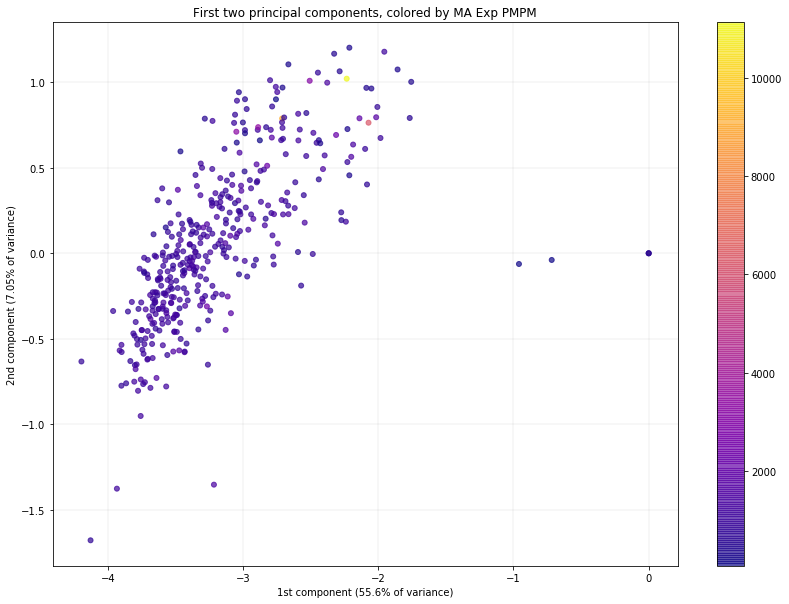

In [0]:
# plt.style.use('seaborn')
# color using the Adult_Exp_PMPM
plt.figure(figsize=(14,10))
plt.scatter(two_d_data[:,0], two_d_data[:,1], alpha=0.7, s=25, c=spread_sen_merged.MA_Exp_PMPM, cmap='plasma')
plt.colorbar()

# add title and axis labels
plt.xlabel(f"1st component ({np.round(pca.explained_variance_ratio_[0]*100, 2)}% of variance)")
plt.ylabel(f"2nd component ({np.round(pca.explained_variance_ratio_[1]*100, 2)}% of variance)")
plt.title("First two principal components, colored by MA Exp PMPM");

# adds major gridlines
plt.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)

In [0]:
# look at what features are being assigned high weight
print(pca.components_[0])
print(pca.components_[1])

[-0.2607222  -0.24561506 -0.25259737 -0.25991457 -0.13475652 -0.25655001
 -0.23374794 -0.20738211 -0.23919133 -0.25592691 -0.25280168 -0.14493941
 -0.19183729 -0.23199957 -0.20357049 -0.21449032 -0.18479888 -0.09307486
 -0.08637424 -0.2261316  -0.11598843 -0.20695823 -0.12377126]
[ 0.17144375  0.05661009  0.10601653  0.11571231 -0.46492302  0.06238046
 -0.06197742 -0.01024509  0.20065779  0.19937438  0.2135659  -0.27521903
 -0.32169845  0.14759823 -0.23816443  0.03691831 -0.43643274 -0.13432007
 -0.11253605  0.11280944 -0.25089967 -0.06436206  0.18180688]


In [0]:
# get in abs value
abs_val_two_d_weights_component_1 = np.abs(pca.components_[0])
abs_val_two_d_weights_component_2 = np.abs(pca.components_[1])

ranking_1 = np.argsort(-abs_val_two_d_weights_component_1)
ranking_2 = np.argsort(-abs_val_two_d_weights_component_2)

# now print out the metrics with highest to lowest absolute weight
print(f'First Component, which explains {np.round(pca.explained_variance_ratio_[0]*100, decimals=2)}% of the variance')
print("="*80)
for r in ranking_1:
    print(X.columns[r], ':', pca.components_[0][r])

print('\n\n')
print(f'Second Component, which explains {np.round(pca.explained_variance_ratio_[1]*100, decimals=2)}% of the variance')
print("="*80)
for r in ranking_2:
    print(X.columns[r], ':', pca.components_[1][r])

First Component, which explains 55.6% of the variance
QN02_3 : -0.26072219962552545
QN09 : -0.2599145706212447
QN35 : -0.256550009583146
QN40 : -0.25592690611103797
QN41 : -0.2528016767006424
QN08 : -0.25259737304673535
QN02_4 : -0.24561505989064267
QN39 : -0.23919133390223785
QN36 : -0.23374793768881902
QN60 : -0.23199956828023247
QN69 : -0.22613160363332205
QN64 : -0.21449031599005594
QN38 : -0.20738210731970239
QN77 : -0.2069582261870626
QN63 : -0.20357049247839468
QN51 : -0.19183728565414576
QN66 : -0.1847988823479185
QN44 : -0.14493941369790994
QN27 : -0.1347565206981469
QN78 : -0.12377125666757834
QN76 : -0.11598842657018799
QN67 : -0.09307485627548434
QN68 : -0.08637424265802511



Second Component, which explains 7.05% of the variance
QN27 : -0.4649230205782188
QN66 : -0.43643274032282825
QN51 : -0.3216984491959325
QN44 : -0.2752190250086795
QN76 : -0.2508996704875364
QN63 : -0.23816443196582066
QN41 : 0.2135659015618605
QN39 : 0.20065778740380047
QN40 : 0.19937437515553372
QN7

Let's try coloring by region to see what happens.

In [0]:
colormap = spread_sen_merged['Region'].copy()

In [0]:
colormap.unique()

array(['CPA', 'WPA', 'WV', 'NEPA', 'DE'], dtype=object)

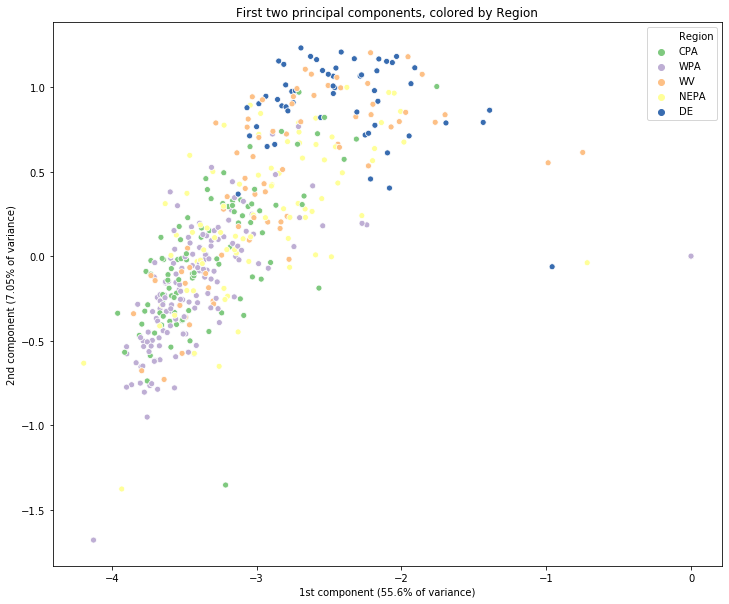

In [0]:
import seaborn as sns

# color by region
plt.figure(figsize=(12,10))
sns.scatterplot(two_d_data[:,0], two_d_data[:,1], hue=colormap, palette="Accent")
# plt.scatter(two_d_data[:,0], two_d_data[:,1], alpha=0.7, c=colormap)

# add title and axis labels
plt.xlabel(f"1st component ({np.round(pca.explained_variance_ratio_[0]*100, 2)}% of variance)")
plt.ylabel(f"2nd component ({np.round(pca.explained_variance_ratio_[1]*100, 2)}% of variance)")
plt.title("First two principal components, colored by Region");

# add legend
plt.legend();

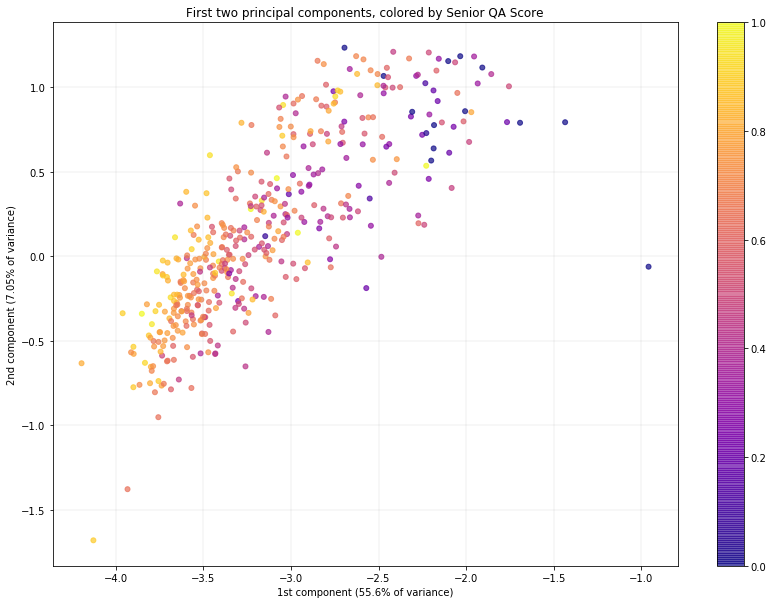

In [0]:
# color using the QA_Score
plt.figure(figsize=(14,10))
plt.scatter(two_d_data[:,0], two_d_data[:,1], alpha=0.7, s=25, c=spread_sen_merged.Senior_QA_Score, cmap='plasma')
plt.colorbar()

# add title and axis labels
plt.xlabel(f"1st component ({np.round(pca.explained_variance_ratio_[0]*100, 2)}% of variance)")
plt.ylabel(f"2nd component ({np.round(pca.explained_variance_ratio_[1]*100, 2)}% of variance)")
plt.title("First two principal components, colored by Senior QA Score");

# adds major gridlines
plt.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)

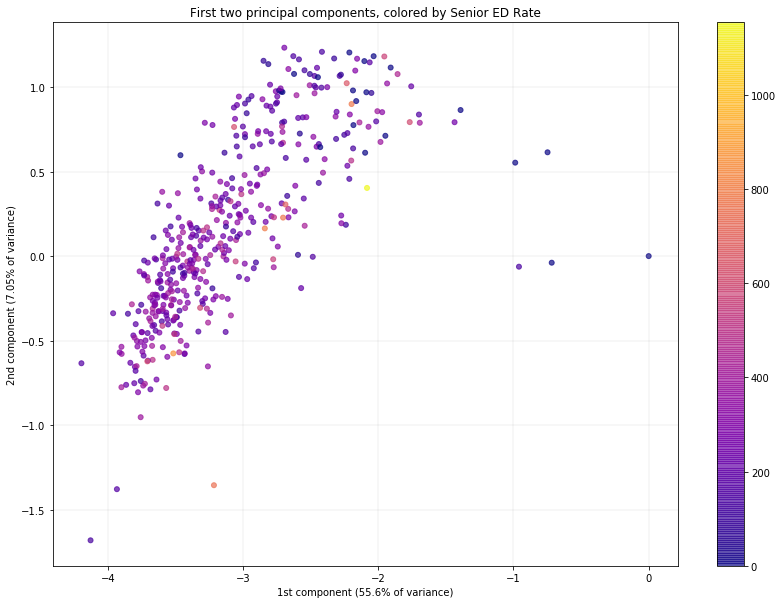

In [0]:

# color using the ED_Score
plt.figure(figsize=(14,10))
plt.scatter(two_d_data[:,0], two_d_data[:,1], alpha=0.7, s=25, c=spread_sen_merged.Senior_ED_Rate, cmap='plasma')
plt.colorbar()

# add title and axis labels
plt.xlabel(f"1st component ({np.round(pca.explained_variance_ratio_[0]*100, 2)}% of variance)")
plt.ylabel(f"2nd component ({np.round(pca.explained_variance_ratio_[1]*100, 2)}% of variance)")
plt.title("First two principal components, colored by Senior ED Rate");

# adds major gridlines
plt.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)

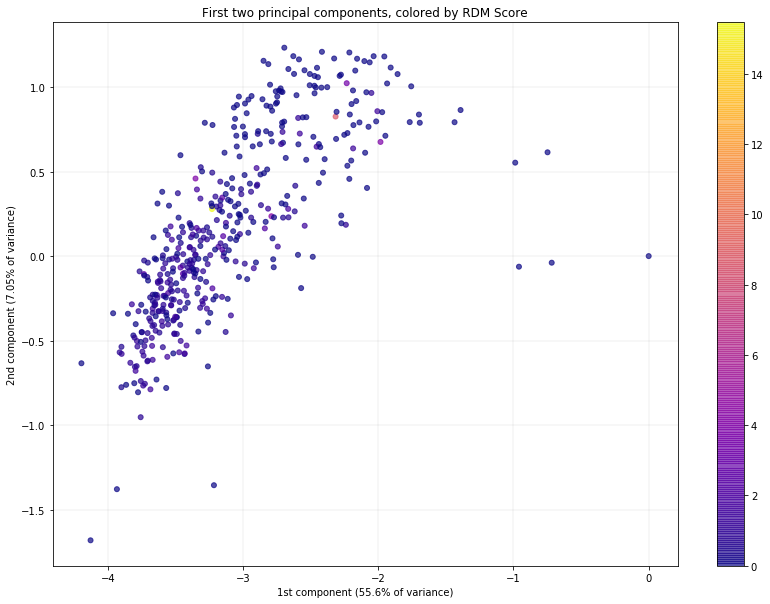

In [0]:

# color using the RDM_Score
plt.figure(figsize=(14,10))
plt.scatter(two_d_data[:,0], two_d_data[:,1], alpha=0.7, s=25, c=spread_sen_merged.Senior_RDM_Rate, cmap='plasma')
plt.colorbar()

# add title and axis labels
plt.xlabel(f"1st component ({np.round(pca.explained_variance_ratio_[0]*100, 2)}% of variance)")
plt.ylabel(f"2nd component ({np.round(pca.explained_variance_ratio_[1]*100, 2)}% of variance)")
plt.title("First two principal components, colored by RDM Score");

# adds major gridlines
plt.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)